In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_excel('data_raw.xlsx')
df.head()

Account      ATMID    caldate  Dispense  DT  MaxCapacity  CountTotalTxn
0     ABC  SPCN02020 2021-01-01    564500   0      2640000            157
1     ABC  TPCN10269 2021-01-01    509000   9      3520000             92
2     ABC  APCN00816 2021-01-01     64800   0      2640000             36
3     PQR   S1CN1142 2021-01-01    834500   0      3520000            101
4     PQR   S1CN2022 2021-01-01    825700   0      2860000            364

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account        14593 non-null  object        
 1   ATMID          14593 non-null  object        
 2   caldate        14593 non-null  datetime64[ns]
 3   Dispense       14593 non-null  int64         
 4   DT             14593 non-null  int64         
 5   MaxCapacity    14593 non-null  int64         
 6   CountTotalTxn  14593 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 798.2+ KB


In [6]:
df.describe()

Dispense            DT   MaxCapacity  CountTotalTxn
count  1.459300e+04  14593.000000  1.459300e+04   14593.000000
mean   4.027993e+05    158.538614  3.279753e+06     105.322963
std    3.036762e+05    356.073765  3.974770e+05      76.727151
min    0.000000e+00      0.000000  2.420000e+06       0.000000
25%    1.685000e+05      0.000000  2.860000e+06      45.000000
50%    3.653000e+05      0.000000  3.520000e+06      98.000000
75%    5.780000e+05     64.000000  3.520000e+06     146.000000
max    2.151800e+06   1440.000000  3.740000e+06     561.000000

In [7]:
df['dayname'] = df['caldate'].dt.day_name()
df['day'] = df['caldate'].dt.day
df['month'] = df['caldate'].dt.month
df['week'] = df['caldate'].dt.isocalendar().week
df['year'] = df['caldate'].dt.isocalendar().year
df['year'] = df['year'].astype(str)
df['week'] = df['week'].astype(str)
df['unique_week'] = df['year'] + '_' + df['week']
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
df = df[df['year'] != 2020]
df.head()

Account      ATMID    caldate  Dispense   DT  MaxCapacity  CountTotalTxn  \
42     ABC  SPCN02020 2021-01-04    164600  168      2640000             65   
43     ABC  TPCN10269 2021-01-04    781500    0      3520000            143   
44     ABC  APCN00816 2021-01-04     63400    0      2640000             30   
45     PQR   S1CN1142 2021-01-04    223500    0      3520000             37   
46     PQR   S1CN2022 2021-01-04   1413500   17      2860000            374   

   dayname  day  month  week  year unique_week  
42  Monday    4      1     1  2021      2021_1  
43  Monday    4      1     1  2021      2021_1  
44  Monday    4      1     1  2021      2021_1  
45  Monday    4      1     1  2021      2021_1  
46  Monday    4      1     1  2021      2021_1

In [8]:
max_capacity = df.loc[:, ['MaxCapacity', 'ATMID', 'Account']].drop_duplicates()
max_capacity.reset_index(inplace=True, drop=True)
max_capacity

MaxCapacity          ATMID Account
0       2640000      SPCN02020     ABC
1       3520000      TPCN10269     ABC
2       2640000      APCN00816     ABC
3       3520000       S1CN1142     PQR
4       2860000       S1CN2022     PQR
5       3520000       SPCND067     PQR
6       3520000      APAN11109     ABC
7       3740000      APAN23217     ABC
8       3520000       SPCNG376     PQR
9       3520000       S1CN3514     PQR
10      3520000       S1CN2820     PQR
11      2420000      APAN22403     ABC
12      2860000      APAN35706     ABC
13      3520000  T1NY000166081     XYZ
14      3520000  T1BH000011116     XYZ
15      3520000  T1BH000603091     XYZ
16      2860000  T1BH000274012     XYZ
17      3520000  T1NH000575414     XYZ
18      3520000       S1CN2011     PQR
19      3520000  T1BH007252090     XYZ
20      3520000  T1BH000003039     XYZ

ATMID unique_week  year  week  Dispense    DT  CountTotalTxn  \
0   APAN11109      2021_1  2021     1   1767500  6229            545   
11  APAN11109      2021_2  2021     2   3373500  2459            930   
22  APAN11109      2021_3  2021     3   1423000  6117            376   
33  APAN11109      2021_4  2021     4   1774000  1873            551   
44  APAN11109      2021_5  2021     5   2913500  1554            791   
48  APAN11109      2021_6  2021     6   4094500  3152           1004   
49  APAN11109      2021_7  2021     7   3097500  2471            934   
50  APAN11109      2021_8  2021     8   1650000  2632            473   
51  APAN11109      2021_9  2021     9   2253500  3600            613   
1   APAN11109     2021_10  2021    10    993500  7914            327   
2   APAN11109     2021_11  2021    11   2202000  2897            517   
3   APAN11109     2021_12  2021    12   1304500  5758            337   
4   APAN11109     2021_13  2021    13   1510000  6059            372   
5   APAN11109     2021_14  2021    14   2169000  3241            494   
6   APAN11109     2021_15  2021    15   1365500  2137            367   
7   APAN11109     2021_16  2021    16   2529500   252            642   
8   APAN11109     2021_17  2021    17   1398000   836            430   
9   APAN11109     2021_18  2021    18   2639000   813            656   
10  APAN11109     2021_19  2021    19   1347500   786            374   
12  APAN11109     2021_20  2021    20   1033500   206            313   
13  APAN11109     2021_21  2021    21   1553000  1984            414   
14  APAN11109     2021_22  2021    22   1892500   531            561   
15  APAN11109     2021_23  2021    23   1539000  4391            440   
16  APAN11109     2021_24  2021    24   2198000  1836            601   
17  APAN11109     2021_25  2021    25   2153500    15            607   
18  APAN11109     2021_26  2021    26   2572500     8            720   
19  APAN11109     2021_27  2021    27   1051000   111            392   
20  APAN11109     2021_28  2021    28   3003500   438            735   
21  APAN11109     2021_29  2021    29    594500  5694            150   
23  APAN11109     2021_30  2021    30   1728500  3232            472   
24  APAN11109     2021_31  2021    31   2218500   936            581   
25  APAN11109     2021_32  2021    32   2221000    25            616   
26  APAN11109     2021_33  2021    33   2689500   849            746   
27  APAN11109     2021_34  2021    34   1347000  1441            468   
28  APAN11109     2021_35  2021    35   2003500   407            546   
29  APAN11109     2021_36  2021    36   1107000  1134            291   
30  APAN11109     2021_37  2021    37         0  8655              0   
31  APAN11109     2021_38  2021    38         0  8995              0   
32  APAN11109     2021_39  2021    39   1822000  1348            487   
34  APAN11109     2021_40  2021    40   1761000  3115            518   
35  APAN11109     2021_41  2021    41   2401500   291            638   
36  APAN11109     2021_42  2021    42   1350000  4976            373   
37  APAN11109     2021_43  2021    43   3637500     0            839   
38  APAN11109     2021_44  2021    44   3682500  1830            828   
39  APAN11109     2021_45  2021    45     16000  9177              6   
40  APAN11109     2021_46  2021    46   2003000  1218            545   
41  APAN11109     2021_47  2021    47   1629000  1115            492   
42  APAN11109     2021_48  2021    48   1302500  1787            387   
43  APAN11109     2021_49  2021    49   3012500   945            701   
45  APAN11109     2021_50  2021    50    649500  7527            173   
46  APAN11109     2021_51  2021    51   1424500  5147            346   
47  APAN11109     2021_52  2021    52   1271500  2803            417   

    MaxCapacity Account  utilization  
0       3520000     ABC     0.502131  
11      3520000     ABC     0.958381  
22      3520000     ABC     0.404261  
33      3520000     ABC     0.50397

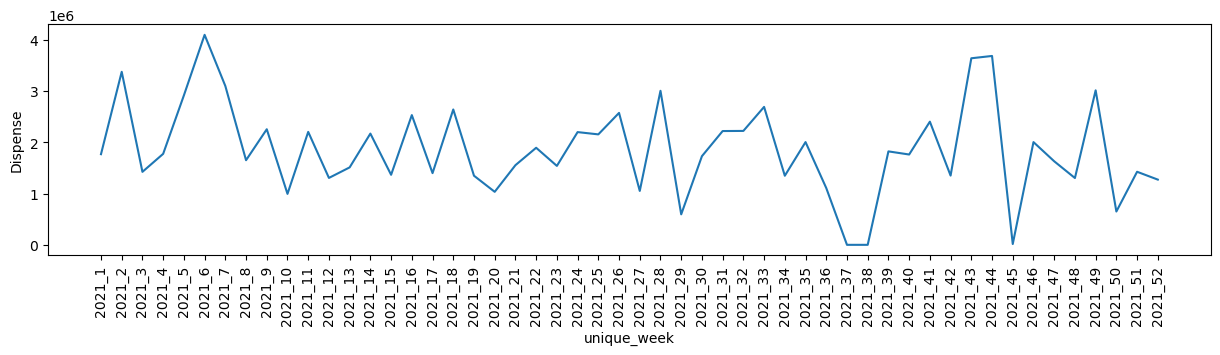

In [9]:
agg_weeklevel_data = df.groupby(['ATMID', 'unique_week', 'year', 'week'])[['Dispense', 'DT', 'CountTotalTxn']].sum().reset_index()
agg_weeklevel_data = agg_weeklevel_data.merge(max_capacity, on='ATMID')
agg_weeklevel_data['utilization'] = agg_weeklevel_data['Dispense']/agg_weeklevel_data['MaxCapacity']
agg_weeklevel_data.sort_values(by=['ATMID', 'year', 'week'], inplace=True)
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
sns.lineplot(data=agg_weeklevel_data[agg_weeklevel_data['ATMID'] == 'APAN11109'].head(52), x='unique_week', y='Dispense')
agg_weeklevel_data.head(52)

In [10]:
agg_weeklevel_data.groupby('ATMID')['Dispense'].describe().reset_index()

ATMID  count          mean           std        min        25%  \
0       APAN11109  112.0  2.086500e+06  8.603127e+05        0.0  1549500.0   
1       APAN22403  112.0  2.799464e+06  1.300140e+06        0.0  1995250.0   
2       APAN23217  112.0  3.319217e+06  1.355064e+06   213000.0  2419775.0   
3       APAN35706  112.0  6.004929e+05  4.349849e+05        0.0   241350.0   
4       APCN00816  112.0  7.385696e+05  2.346803e+05   202600.0   603350.0   
5        S1CN1142  112.0  1.781239e+06  9.539630e+05        0.0  1123625.0   
6        S1CN2011   73.0  1.030273e+06  5.834219e+05   141000.0   608500.0   
7        S1CN2022  112.0  4.661402e+06  1.715781e+06   587100.0  3457450.0   
8        S1CN2820  112.0  2.612273e+06  8.045367e+05        0.0  2078550.0   
9        S1CN3514  112.0  3.307799e+06  1.163995e+06        0.0  2626625.0   
10      SPCN02020  112.0  2.797200e+06  1.085609e+06   234500.0  2105525.0   
11       SPCND067  112.0  4.105004e+06  1.321039e+06        0.0  3452250.0   
12       SPCNG376  112.0  2.089906e+06  9.904168e+05        0.0  1536125.0   
13  T1BH000003039   36.0  1.752694e+06  8.076827e+05   127500.0  1186000.0   
14  T1BH000011116   92.0  3.716307e+06  1.343402e+06   549000.0  2935575.0   
15  T1BH000274012   89.0  2.037943e+06  8.945725e+05        0.0  1634400.0   
16  T1BH000603091   89.0  2.284787e+06  1.005341e+06    36000.0  1692000.0   
17  T1BH007252090   60.0  3.746810e+06  1.707194e+06        0.0  2764500.0   
18  T1NH000575414   87.0  3.227538e+06  1.204282e+06   146500.0  2508750.0   
19  T1NY000166081  112.0  4.339237e+06  1.619677e+06   981900.0  3159925.0   
20      TPCN10269  112.0  4.824869e+06  1.583341e+06  1813500.0  3734550.0   

          50%        75%        max  
0   2083500.0  2598750.0  5723000.0  
1   2807250.0  3540650.0  6886000.0  
2   3136000.0  4270450.0  8026300.0  
3    520550.0   857150.0  2197500.0  
4    722850.0   903600.0  1359500.0  
5   1675750.0  2382625.0  4556500.0  
6    919500.0  1397000.0  2901700.0  
7   4552000.0  5804025.0  9030700.0  
8   2555100.0  3252200.0  4553800.0  
9   3294250.0  4111125.0  5723000.0  
10  2651100.0  3485175.0  6265700.0  
11  4289500.0  4944625.0  7346000.0  
12  2107500.0  2576625.0  4934500.0  
13  1889750.0  2366000.0  3325000.0  
14  3583150.0  4493475.0  7337900.0  
15  2092000.0  2567500.0  4264300.0  
16  2160500.0  2716500.0  5363500.0  
17  3928050.0  5045500.0  7193000.0  
18  3140900.0  3939750.0  6449000.0  
19  4231250.0  5470225.0  9505200.0  
20  4518900.0  5574750.0  8801600.0

### Outlier Check

<Axes: xlabel='Dispense'>

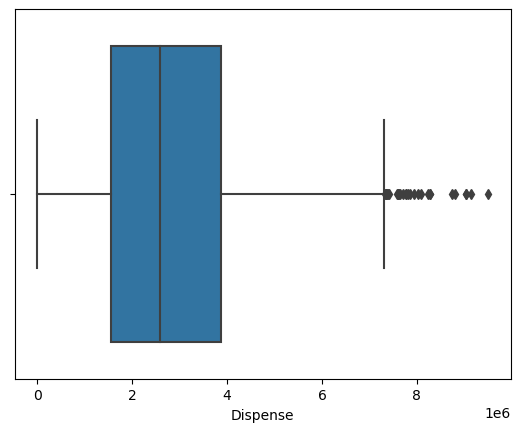

In [11]:
sns.boxplot(x=agg_weeklevel_data['Dispense'])

In [12]:
iqr = agg_weeklevel_data['Dispense'].quantile(0.75) - agg_weeklevel_data['Dispense'].quantile(0.25)
lqr = agg_weeklevel_data['Dispense'].quantile(0.25) - 1.5 * iqr
uqr = agg_weeklevel_data['Dispense'].quantile(0.25) + 1.5 * iqr
agg_weeklevel_data[(agg_weeklevel_data['Dispense'] <= lqr) | (agg_weeklevel_data['Dispense'] >= uqr)]

ATMID unique_week  year  week  Dispense    DT  CountTotalTxn  \
88    APAN11109     2022_42  2022    42   5723000   297           1177   
168   APAN22403     2022_13  2022    13   5614600    28           1191   
169   APAN22403     2022_14  2022    14   6886000    29           1315   
188   APAN22403     2022_31  2022    31   5682700    52           1090   
248   APAN23217     2021_31  2021    31   5970800   432           1427   
...         ...         ...   ...   ...       ...   ...            ...   
2076  TPCN10269     2022_48  2022    48   6568100  1452            845   
2077  TPCN10269     2022_49  2022    49   6219900  1048            849   
2079  TPCN10269     2022_50  2022    50   5684700   147            786   
2080  TPCN10269     2022_51  2022    51   5400600   826            805   
2081  TPCN10269     2022_52  2022    52   5408700  2005            803   

      MaxCapacity Account  utilization  
88        3520000     ABC     1.625852  
168       2420000     ABC     2.320083  
169       2420000     ABC     2.845455  
188       2420000     ABC     2.348223  
248       3740000     ABC     1.596471  
...           ...     ...          ...  
2076      3520000     ABC     1.865938  
2077      3520000     ABC     1.767017  
2079      3520000     ABC     1.614972  
2080      3520000     ABC     1.534261  
2081      3520000     ABC     1.536563  

[216 rows x 10 columns]

### Check Over Utilized ATM

Let's see how many % of weeks the ATMs are overutilized i.e, dispensed amount is more than max capacity 

<Axes: xlabel='ATMID', ylabel='over_utilized_week'>

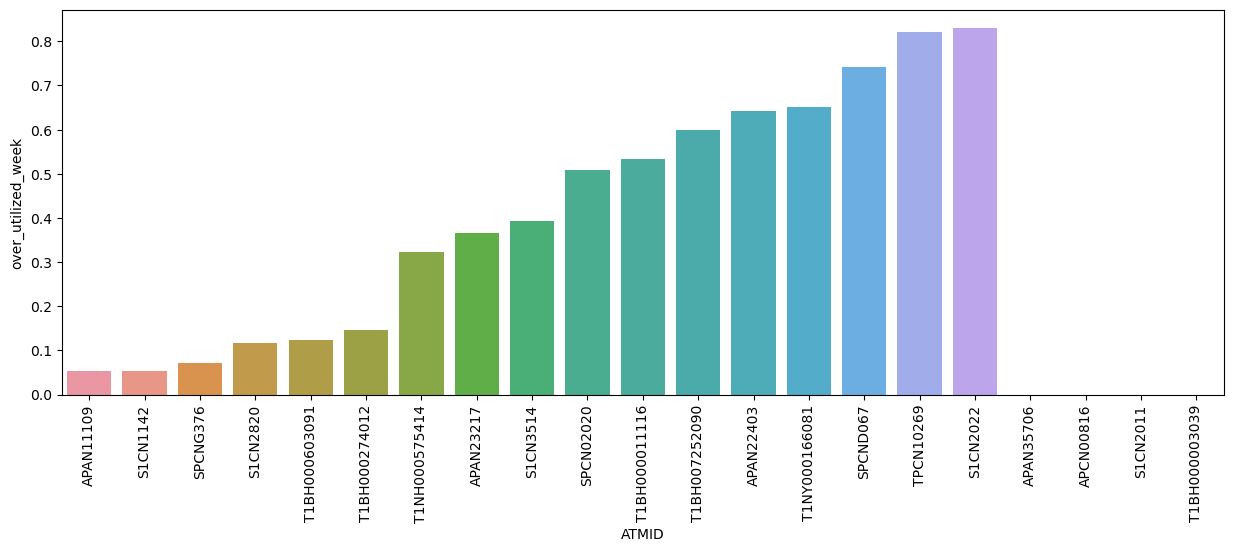

In [13]:
over_utilized = pd.DataFrame(agg_weeklevel_data[(agg_weeklevel_data['utilization'] > 1)].groupby('ATMID')['unique_week'].nunique()/agg_weeklevel_data.groupby('ATMID')['unique_week'].nunique())
over_utilized.reset_index(inplace=True)
over_utilized.rename(columns={'unique_week':'over_utilized_week'}, inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=over_utilized, x='ATMID', y='over_utilized_week', order=over_utilized.sort_values('over_utilized_week').ATMID)

So the above graph state, we need to load cash more than once a week 

### Check ATM which goes frequently down 

<Axes: xlabel='ATMID', ylabel='DT'>

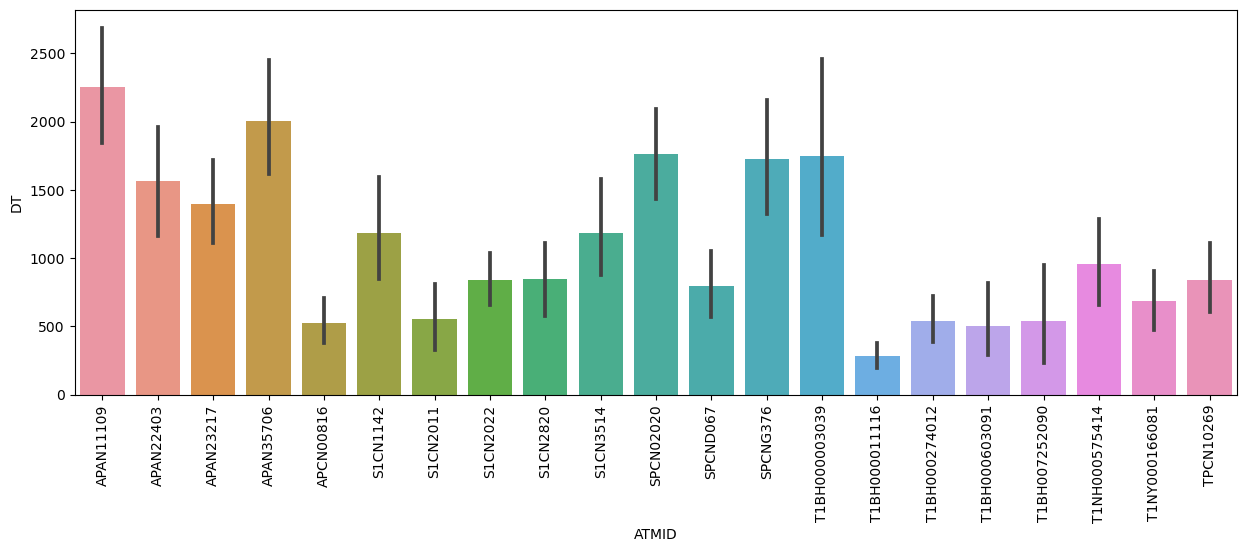

In [14]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=agg_weeklevel_data, x='ATMID', y='DT')

### Let's see if there is any corelation between downtime and utilization

<Axes: >

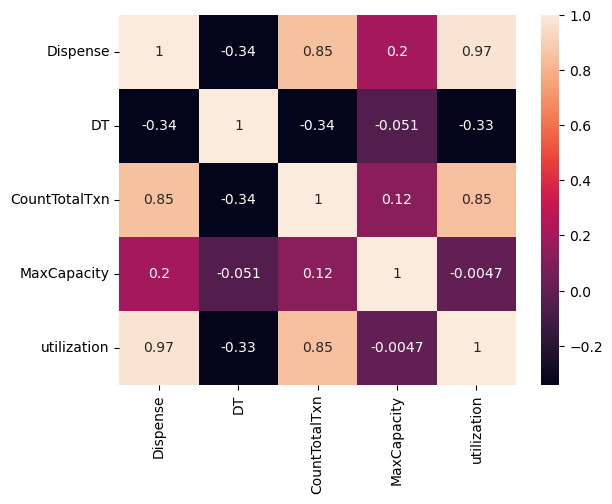

In [15]:
sns.heatmap(agg_weeklevel_data.loc[:, ['Dispense', 'DT', 'CountTotalTxn', 'MaxCapacity', 'utilization']].corr(), annot=True, )

We can see utilization is negatively correlated with downtime. When utilization increases then ATM goes down due to out of cash.

### Decomposition
Let's dicompose the dispense trend to understand trend, seasonality and outlier

In [16]:
agg_weeklevel_data.head()

ATMID unique_week  year  week  Dispense    DT  CountTotalTxn  \
0   APAN11109      2021_1  2021     1   1767500  6229            545   
11  APAN11109      2021_2  2021     2   3373500  2459            930   
22  APAN11109      2021_3  2021     3   1423000  6117            376   
33  APAN11109      2021_4  2021     4   1774000  1873            551   
44  APAN11109      2021_5  2021     5   2913500  1554            791   

    MaxCapacity Account  utilization  
0       3520000     ABC     0.502131  
11      3520000     ABC     0.958381  
22      3520000     ABC     0.404261  
33      3520000     ABC     0.503977  
44      3520000     ABC     0.827699

In [125]:
atm_week_wise_dispense = agg_weeklevel_data.pivot_table(columns=['ATMID'], values=['Dispense'], index='unique_week')
atm_week_wise_dispense.columns = [col[1] for col in atm_week_wise_dispense.columns]
last_24_week_dispense = atm_week_wise_dispense.iloc[-24:, :]
last_24_week_dispense.head()

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816   S1CN1142  \
unique_week                                                                     
2022_42      5723000.0  3129300.0  3932700.0   655500.0   224600.0  1569700.0   
2022_43      1776500.0  1759900.0  3758500.0   374000.0   418200.0  1441500.0   
2022_44      2080500.0  3947800.0  5683800.0   549700.0  1130200.0  1945500.0   
2022_45      2625000.0  3865300.0  4466500.0   999700.0   859700.0  1783200.0   
2022_46      2798000.0  2817500.0  1975400.0   915400.0   763400.0  1837800.0   

              S1CN2011   S1CN2022   S1CN2820   S1CN3514  ...   SPCND067  \
unique_week                                              ...              
2022_42      1752400.0  4241700.0  4553800.0  4126000.0  ...  7346000.0   
2022_43       555500.0  2918300.0  1446200.0  3509000.0  ...  5497000.0   
2022_44      2387000.0  6530200.0  3413700.0  4918000.0  ...  6026500.0   
2022_45      1601400.0  5194900.0  3547000.0  5049000.0  ...  2137500.0   
2022_46      1279800.0  3586200.0  3034500.0  4116000.0  ...  4843500.0   

              SPCNG376  T1BH000003039  T1BH000011116  T1BH000274012  \
unique_week                                                           
2022_42      2248000.0      2934500.0      4361000.0      3349000.0   
2022_43      1313000.0      2364000.0      4190400.0      1030400.0   
2022_44      1125000.0      2513000.0      5111200.0      2151500.0   
2022_45      1596000.0      2372000.0      3584700.0      2354700.0   
2022_46        14500.0      2194000.0      3626900.0      2123000.0   

             T1BH000603091  T1BH007252090  T1NH000575414  T1NY000166081  \
unique_week                                                               
2022_42          3579500.0      3837200.0      3601500.0      2185100.0   
2022_43          1799000.0      4416200.0      2959000.0      3361700.0   
2022_44          4909000.0      5577300.0      2147000.0      3110500.0   
2022_45          2232000.0      5404000.0      2757500.0      2301400.0   
2022_46          2528500.0      3503100.0      2535000.0      2785200.0   

             TPCN10269  
unique_week             
2022_42      7616000.0  
2022_43      3790500.0  
2022_44      6810500.0  
2022_45      7948500.0  
2022_46      7333100.0  

[5 rows x 21 columns]

In [157]:
modeldata = atm_week_wise_dispense.iloc[-60:, :]
modeldata.drop(columns=['T1BH000003039'], inplace=True)
modeldata['year_week'] = modeldata.index
modeldata['year'] = modeldata['year_week'].apply(lambda x:int(x.split('_')[0]))
modeldata['week'] = modeldata['year_week'].apply(lambda x:int(x.split('_')[1]))
modeldata.sort_values(by=['year', 'week'], inplace=True)
modeldata['srl'] = np.arange(60)
modeldata_new = modeldata.melt(id_vars=['year_week', 'year','week', 'srl'])
modeldata_new

year_week  year  week  srl   variable      value
0       2022_1  2022     1    0  APAN11109  2116000.0
1       2022_2  2022     2    1  APAN11109  1525000.0
2       2022_3  2022     3    2  APAN11109  2318000.0
3       2022_4  2022     4    3  APAN11109  1928500.0
4       2022_5  2022     5    4  APAN11109  2451000.0
...        ...   ...   ...  ...        ...        ...
1195    2023_4  2023     4   55  TPCN10269  4155100.0
1196    2023_5  2023     5   56  TPCN10269  3733200.0
1197    2023_6  2023     6   57  TPCN10269  4325400.0
1198    2023_7  2023     7   58  TPCN10269  4518300.0
1199    2023_8  2023     8   59  TPCN10269  1813500.0

[1200 rows x 6 columns]

In [183]:
modeldata_new1 = modeldata_new.copy()
modeldata_new1['srl'] = modeldata_new1['srl'] - 1
final_data = modeldata_new.merge(modeldata_new1, on=['variable', 'srl'])
final_data = final_data.loc[:, ['value_x', 'value_y']]
final_data

value_x    value_y
0     2116000.0  1525000.0
1     1525000.0  2318000.0
2     2318000.0  1928500.0
3     1928500.0  2451000.0
4     2451000.0  2025500.0
...         ...        ...
1175  4192500.0  4155100.0
1176  4155100.0  3733200.0
1177  3733200.0  4325400.0
1178  4325400.0  4518300.0
1179  4518300.0  1813500.0

[1180 rows x 2 columns]

In [259]:
x = final_data.iloc[:, :1].values
y = final_data.iloc[:, -1:].values

In [210]:
# final_data.iloc[:, 1]

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [264]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_absolute_error(y_test, y_pred))

R2: 0.48823282559873105
MSE: 820724.5337288246


In [265]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_absolute_error(y_test, y_pred))

R2: 0.48823282559873105
MSE: 820724.5337288246


In [266]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_absolute_error(y_test, y_pred))

R2: 0.24578713381689177
MSE: 1005881.0750706214


In [229]:
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.45151087963248704

In [233]:
mean_absolute_error(y_test, y_pred)

916432.1533211385

In [168]:
modeldata_new1

year_week  year  week  srl   variable      value
0       2022_1  2022     1    1  APAN11109  2116000.0
1       2022_2  2022     2    2  APAN11109  1525000.0
2       2022_3  2022     3    3  APAN11109  2318000.0
3       2022_4  2022     4    4  APAN11109  1928500.0
4       2022_5  2022     5    5  APAN11109  2451000.0
...        ...   ...   ...  ...        ...        ...
1195    2023_4  2023     4   56  TPCN10269  4155100.0
1196    2023_5  2023     5   57  TPCN10269  3733200.0
1197    2023_6  2023     6   58  TPCN10269  4325400.0
1198    2023_7  2023     7   59  TPCN10269  4518300.0
1199    2023_8  2023     8   60  TPCN10269  1813500.0

[1200 rows x 6 columns]

In [169]:
modeldata_new

year_week  year  week  srl   variable      value
0       2022_1  2022     1    0  APAN11109  2116000.0
1       2022_2  2022     2    1  APAN11109  1525000.0
2       2022_3  2022     3    2  APAN11109  2318000.0
3       2022_4  2022     4    3  APAN11109  1928500.0
4       2022_5  2022     5    4  APAN11109  2451000.0
...        ...   ...   ...  ...        ...        ...
1195    2023_4  2023     4   55  TPCN10269  4155100.0
1196    2023_5  2023     5   56  TPCN10269  3733200.0
1197    2023_6  2023     6   57  TPCN10269  4325400.0
1198    2023_7  2023     7   58  TPCN10269  4518300.0
1199    2023_8  2023     8   59  TPCN10269  1813500.0

[1200 rows x 6 columns]

#### Check & fix missing values

In [115]:
last_24_week_dispense.isna().sum()

APAN11109        0
APAN22403        0
APAN23217        0
APAN35706        0
APCN00816        0
S1CN1142         0
S1CN2011         0
S1CN2022         0
S1CN2820         0
S1CN3514         0
SPCN02020        0
SPCND067         0
SPCNG376         0
T1BH000003039    5
T1BH000011116    0
T1BH000274012    0
T1BH000603091    0
T1BH007252090    0
T1NH000575414    0
T1NY000166081    0
TPCN10269        0
dtype: int64

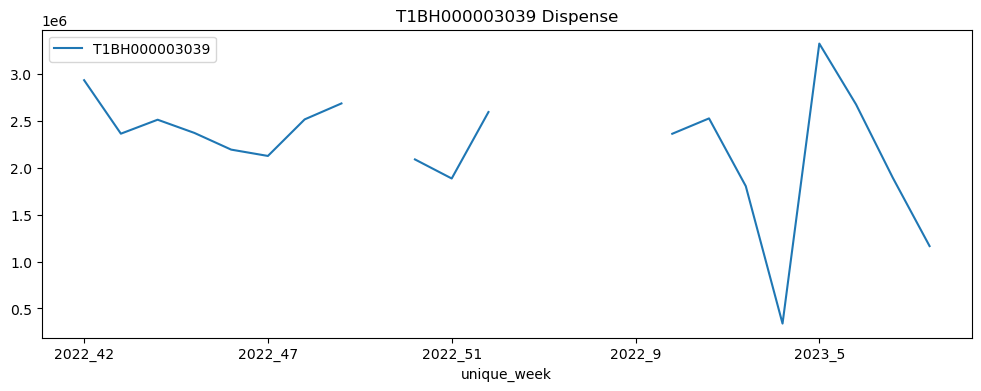

In [36]:
#Impute the missing values with linear interpolation
last_24_week_dispense[['T1BH000003039']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('T1BH000003039 Dispense')
plt.show(block=False)

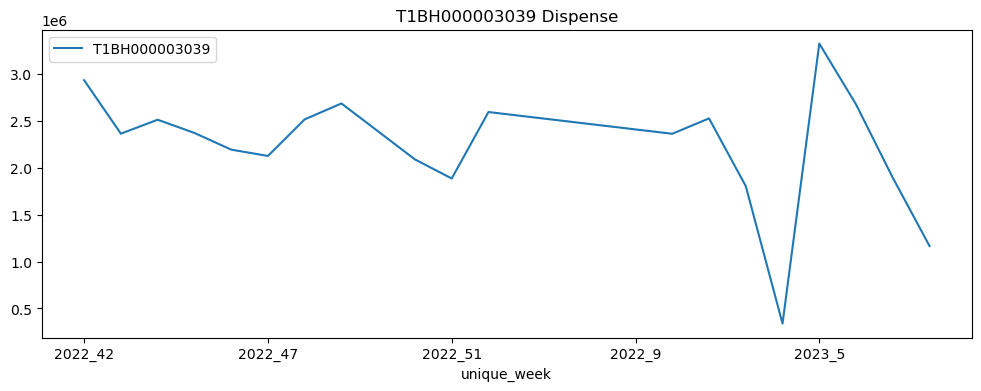

In [37]:
#Linear interpolate
last_24_week_dispense = last_24_week_dispense.assign(T1BH000003039=last_24_week_dispense.T1BH000003039.interpolate(method='linear'))
last_24_week_dispense[['T1BH000003039']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('T1BH000003039 Dispense')
plt.show(block=False)

#### Additive seasonal decomposition

ATMID: APAN11109


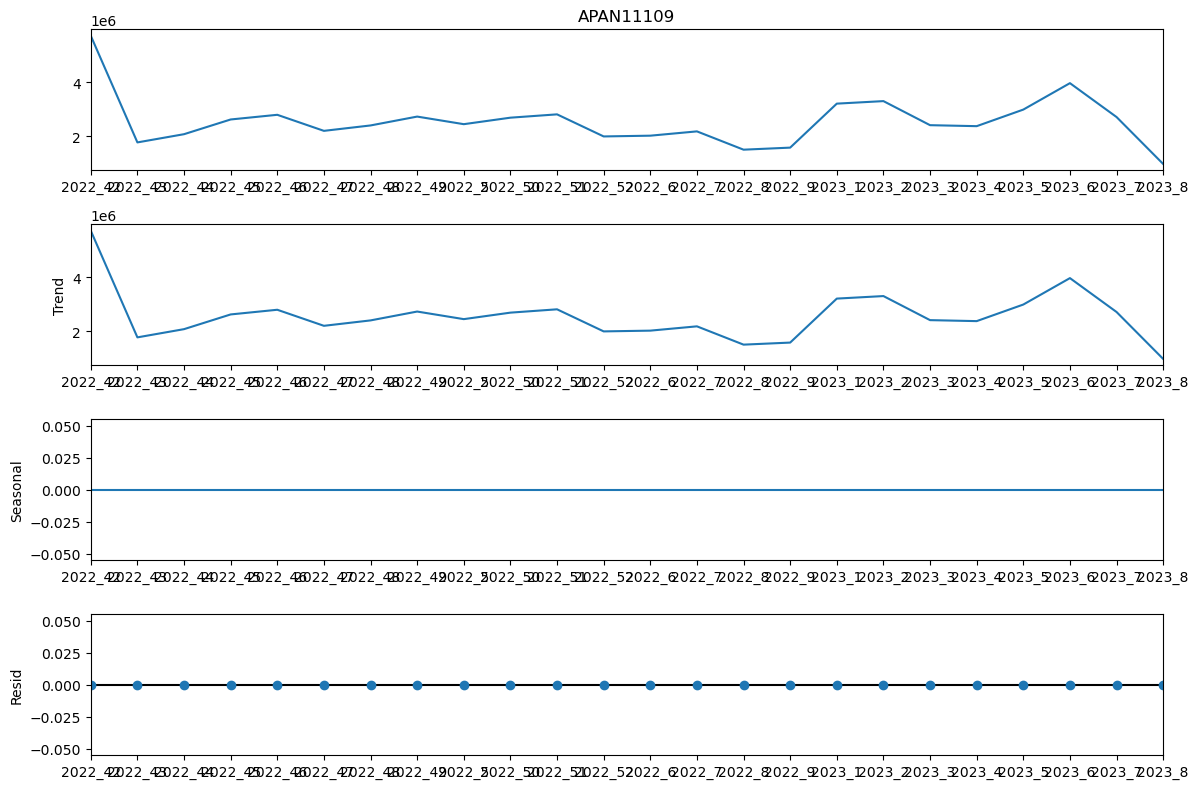

ATMID: APAN22403


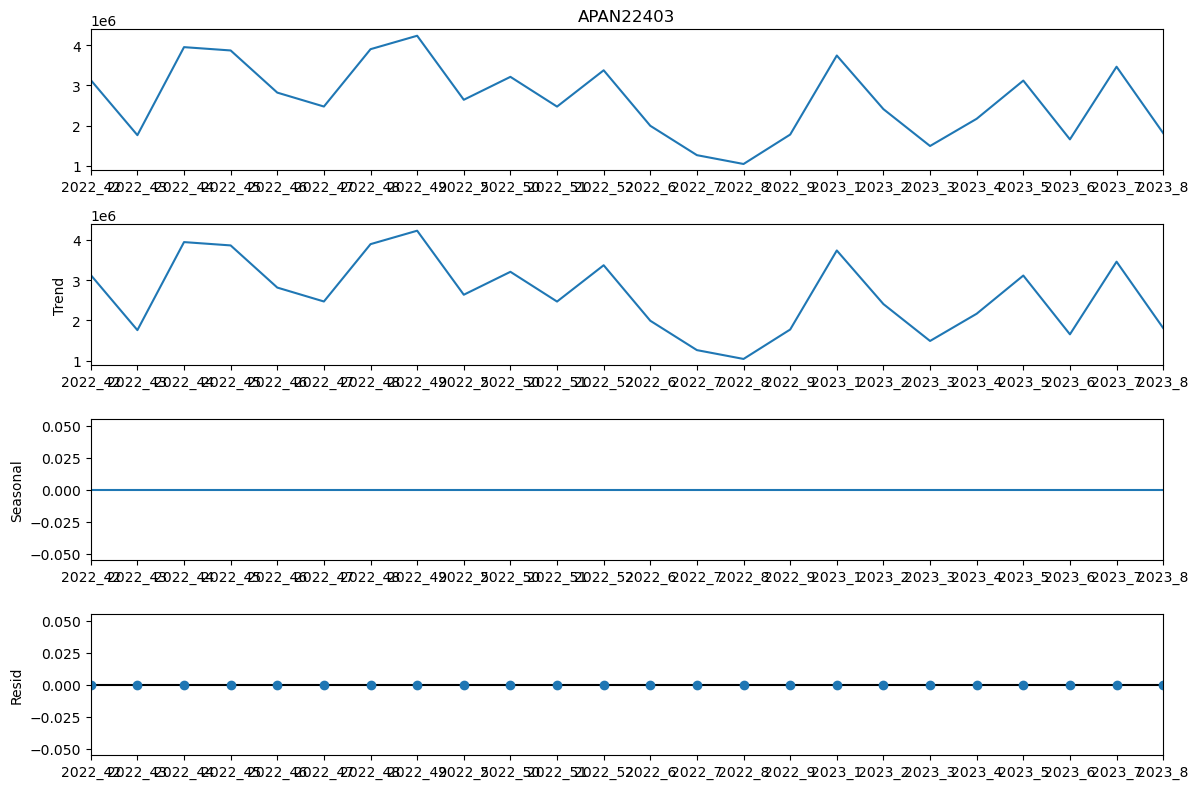

ATMID: APAN23217


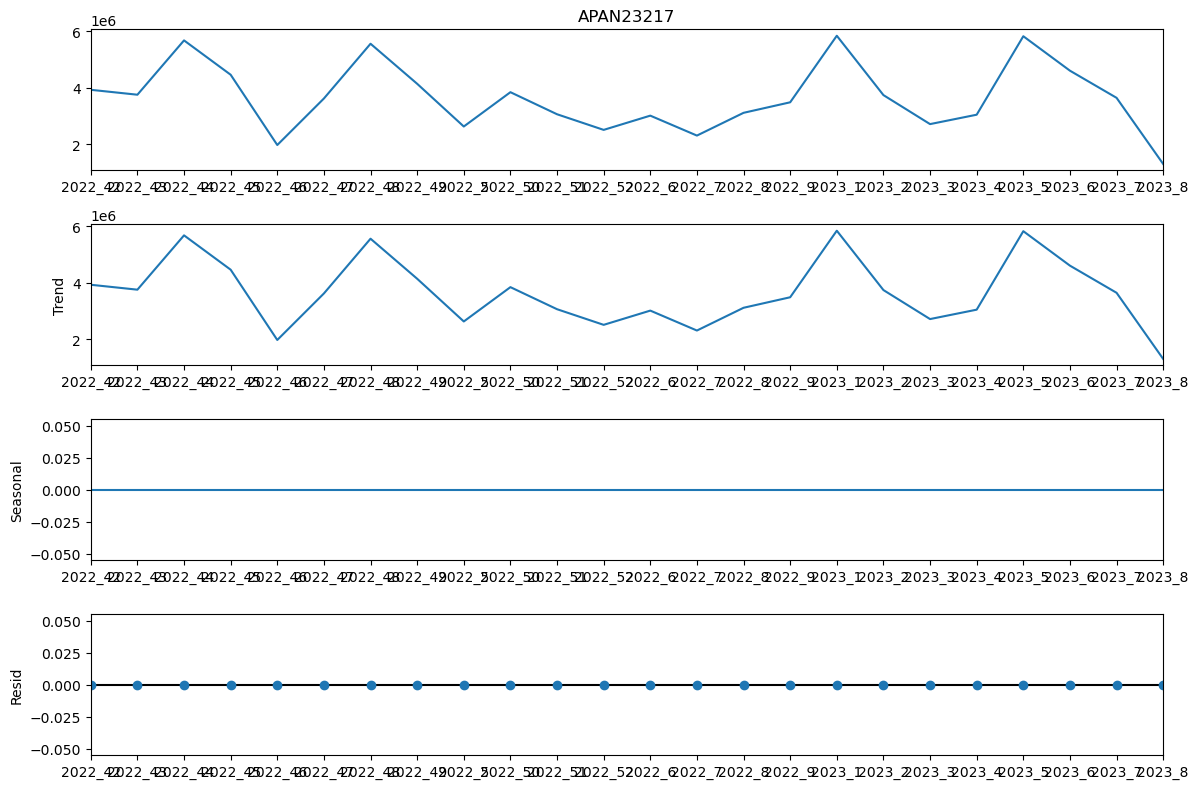

ATMID: APAN35706


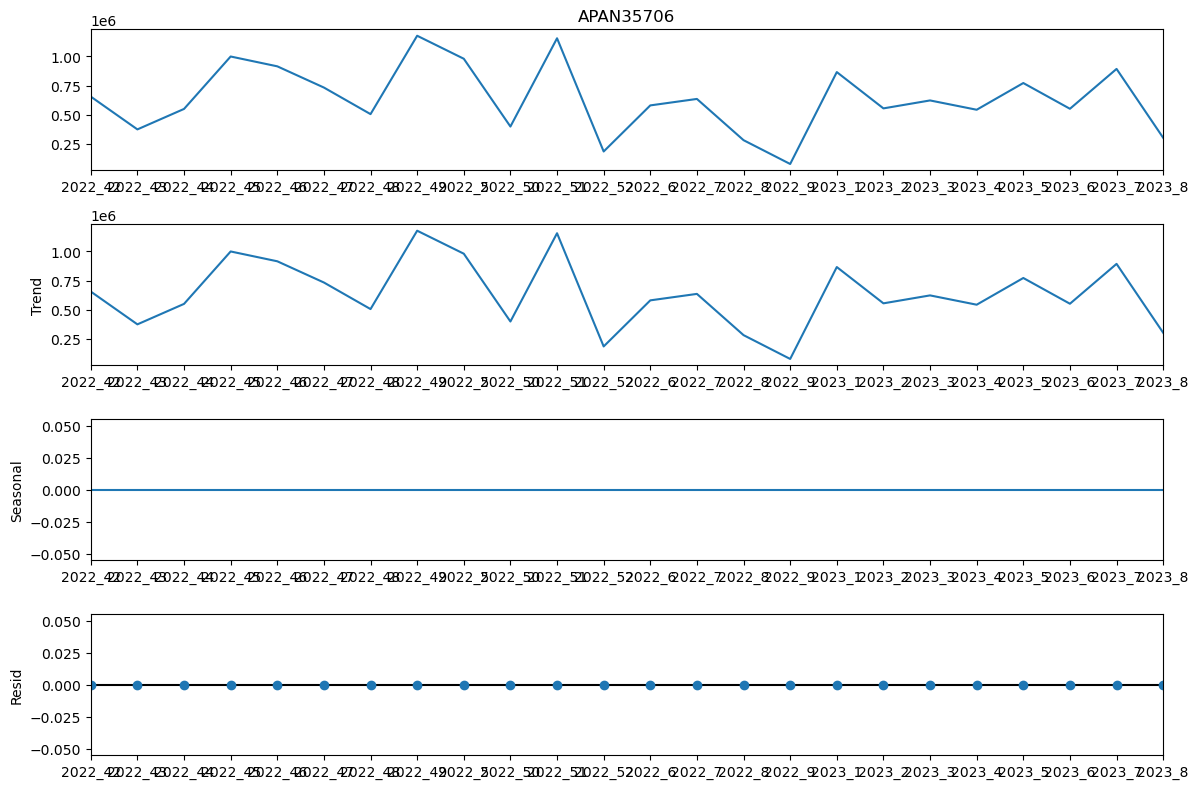

ATMID: APCN00816


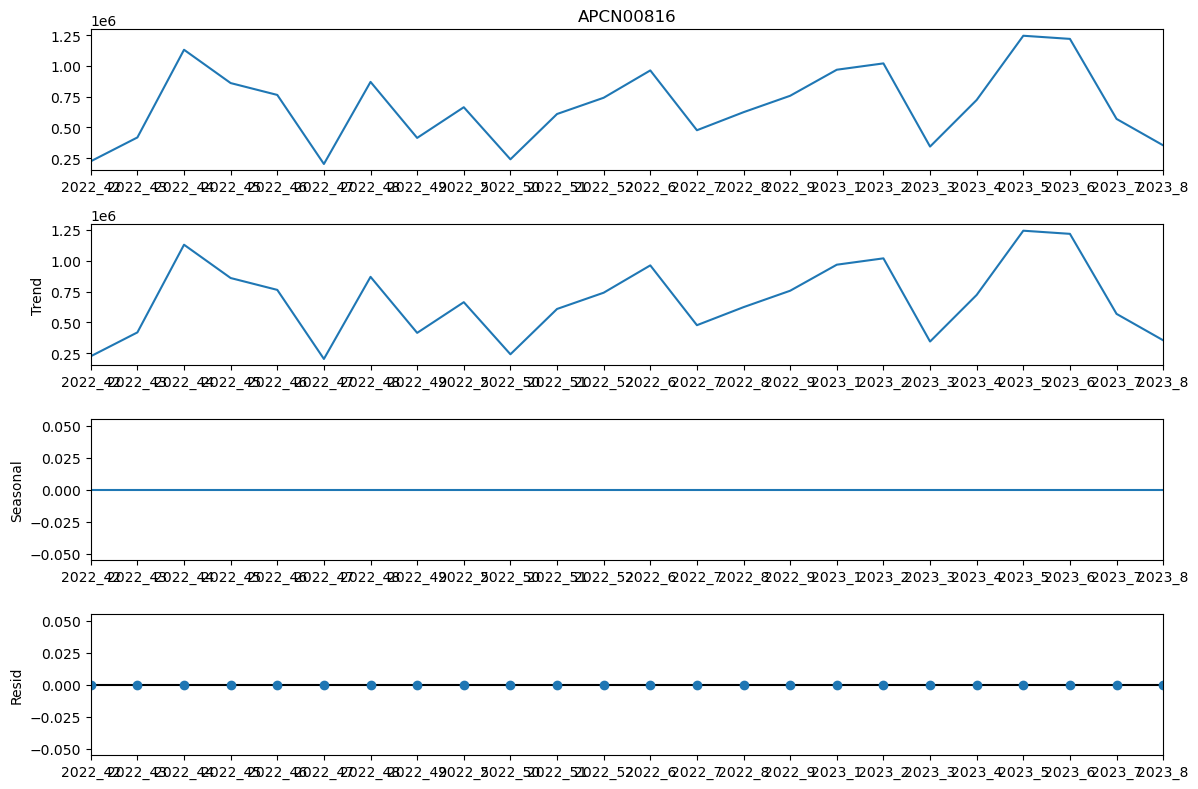

ATMID: S1CN1142


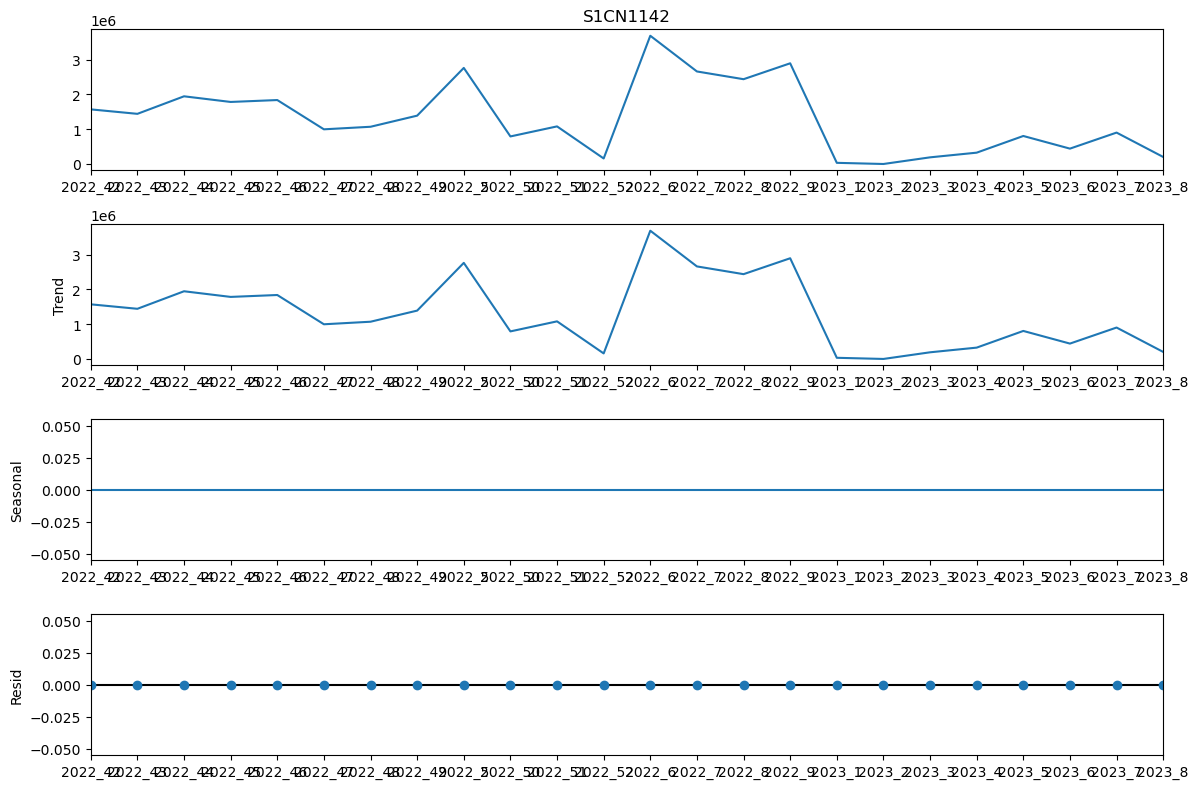

ATMID: S1CN2011


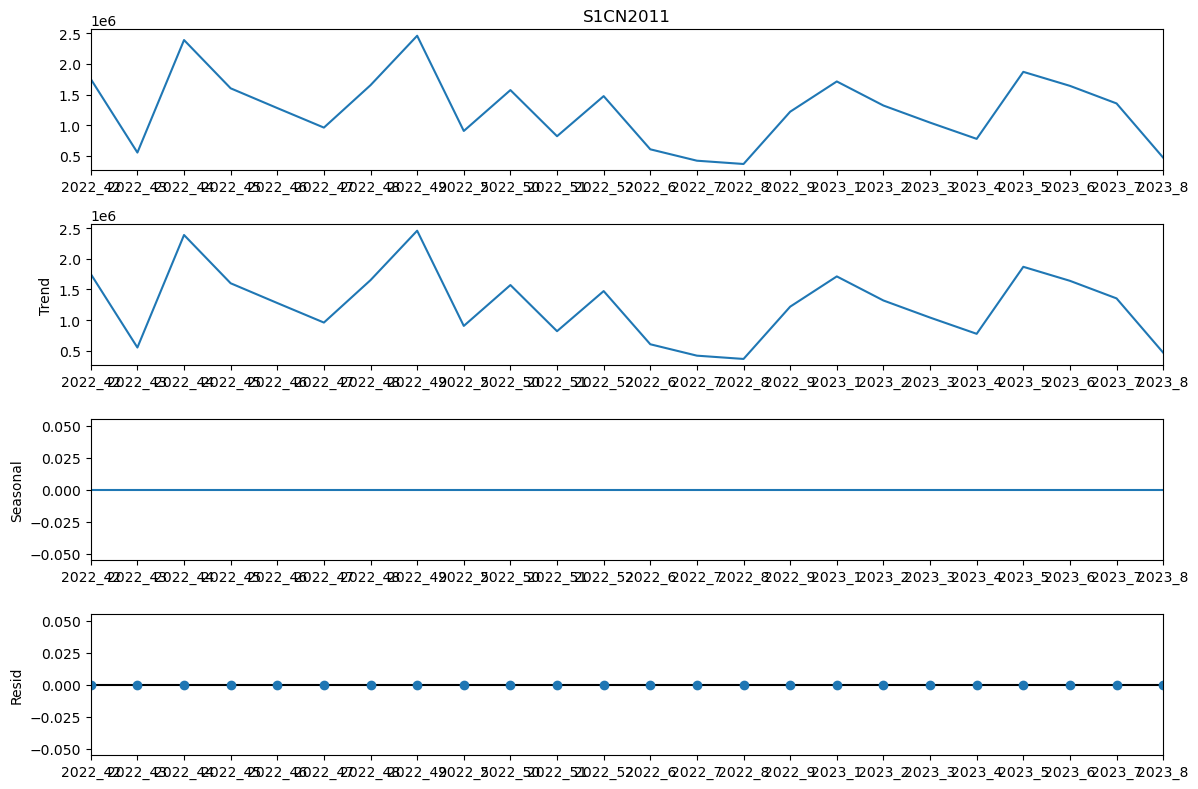

ATMID: S1CN2022


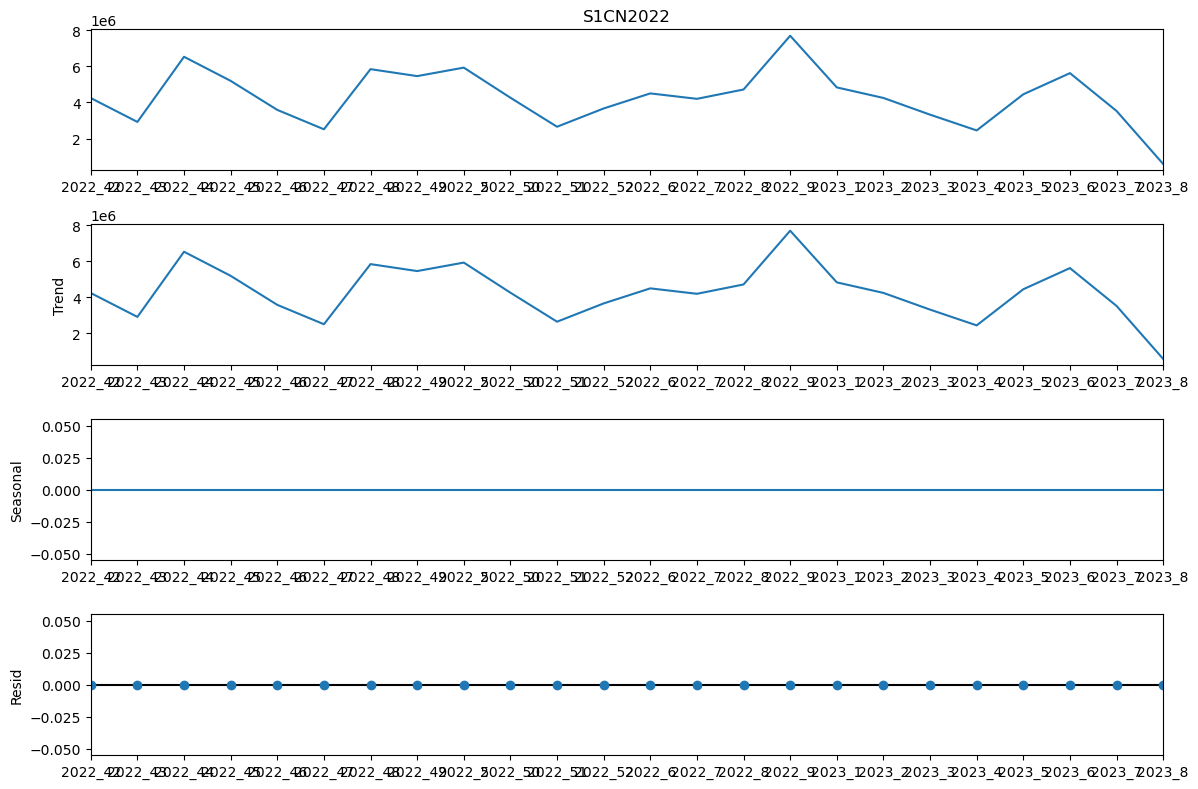

ATMID: S1CN2820


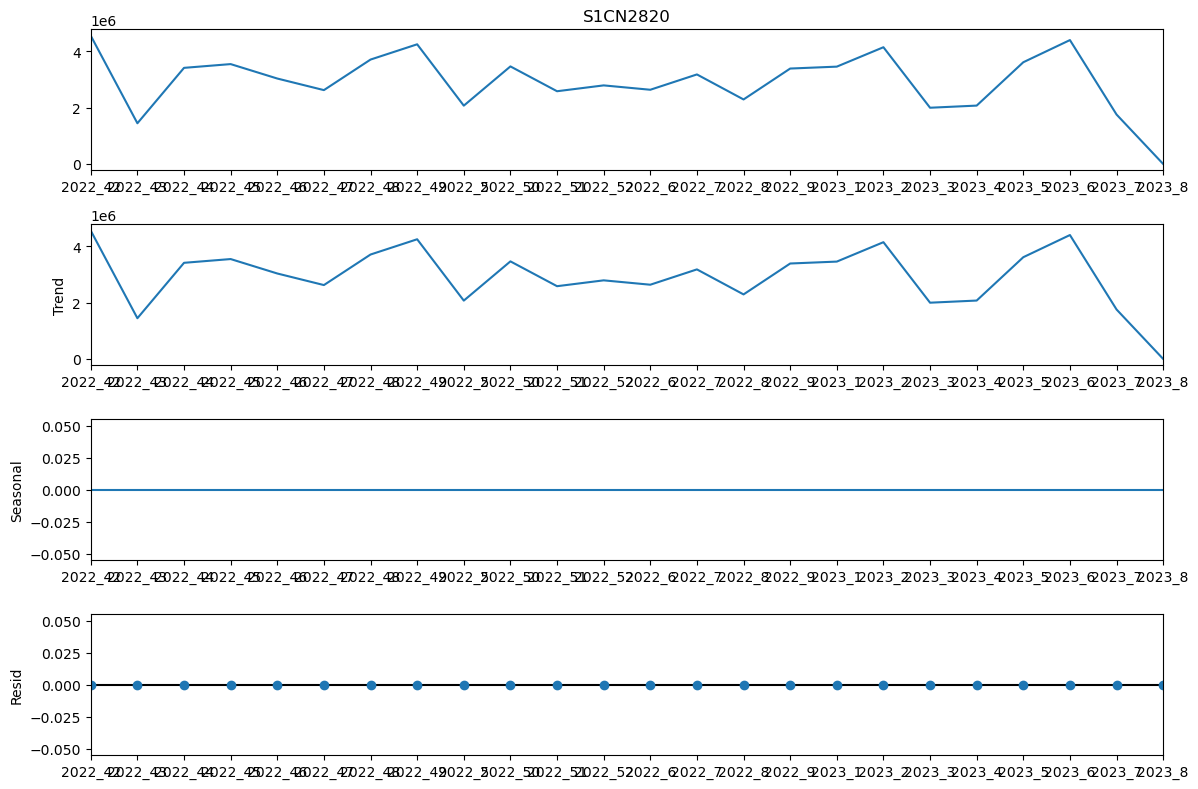

ATMID: S1CN3514


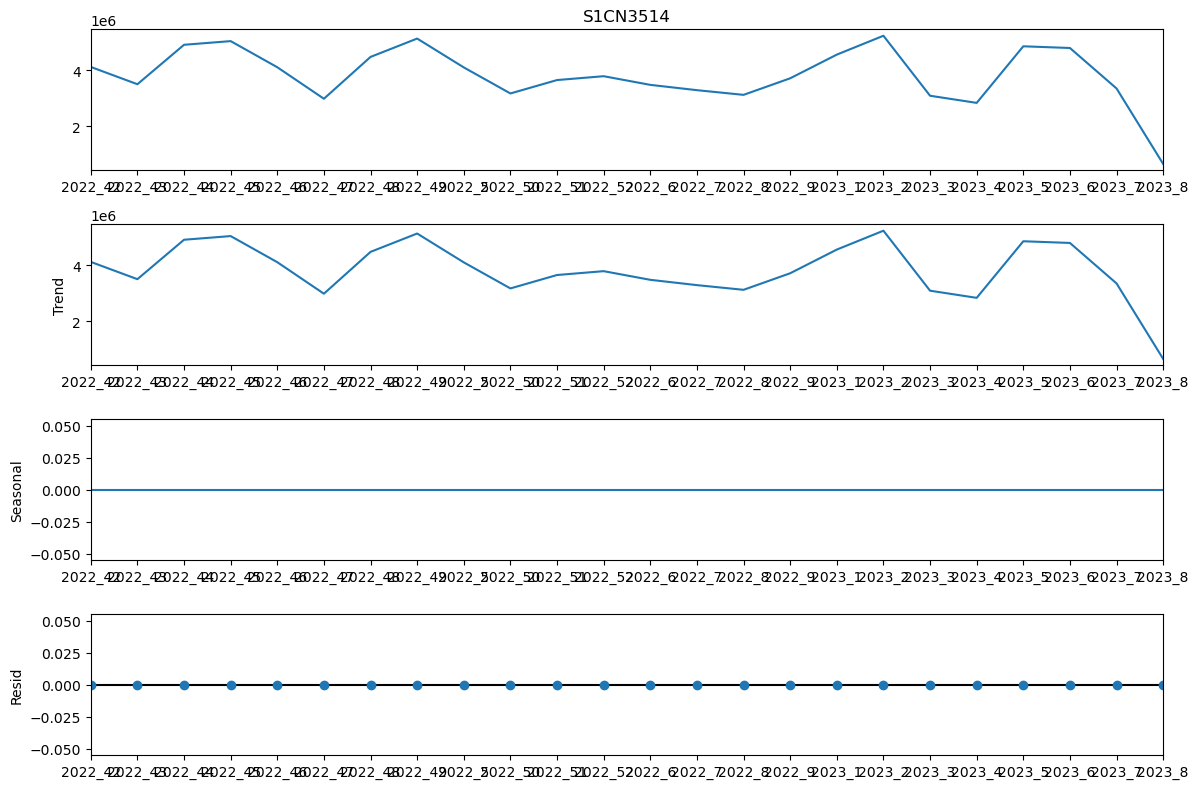

ATMID: SPCN02020


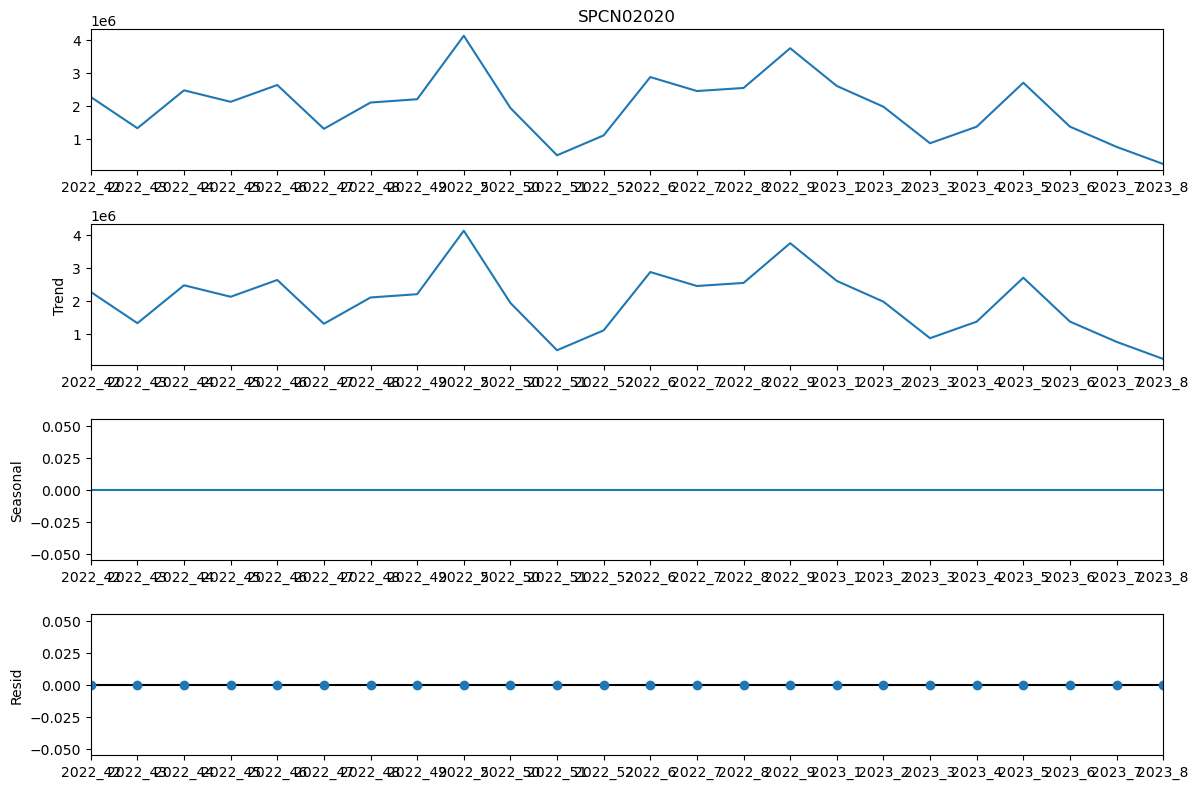

ATMID: SPCND067


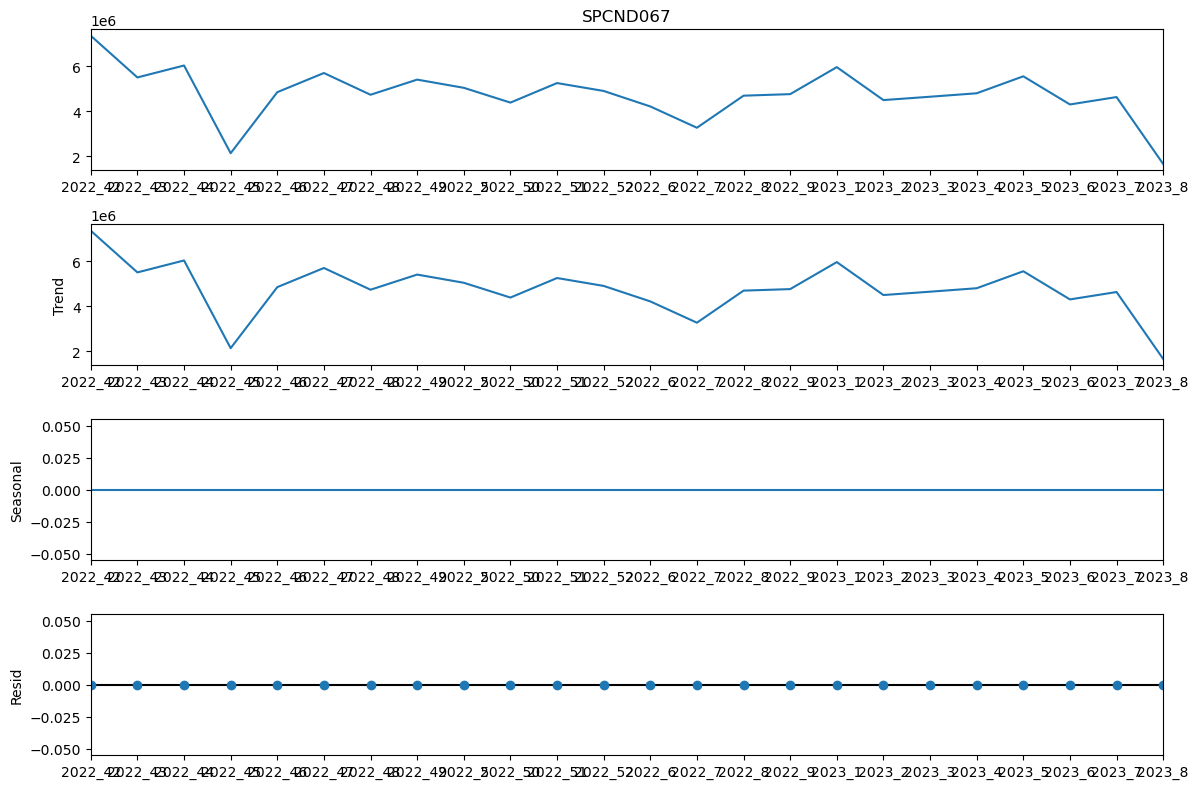

ATMID: SPCNG376


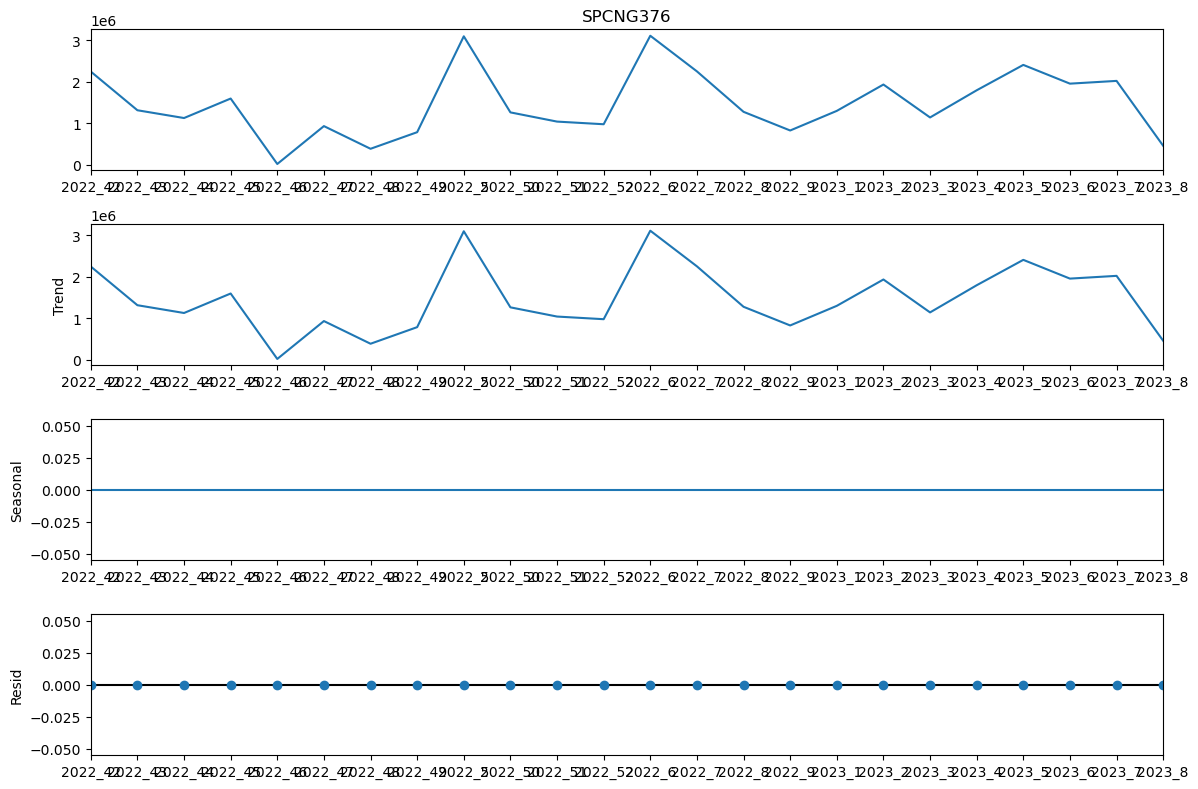

ATMID: T1BH000003039


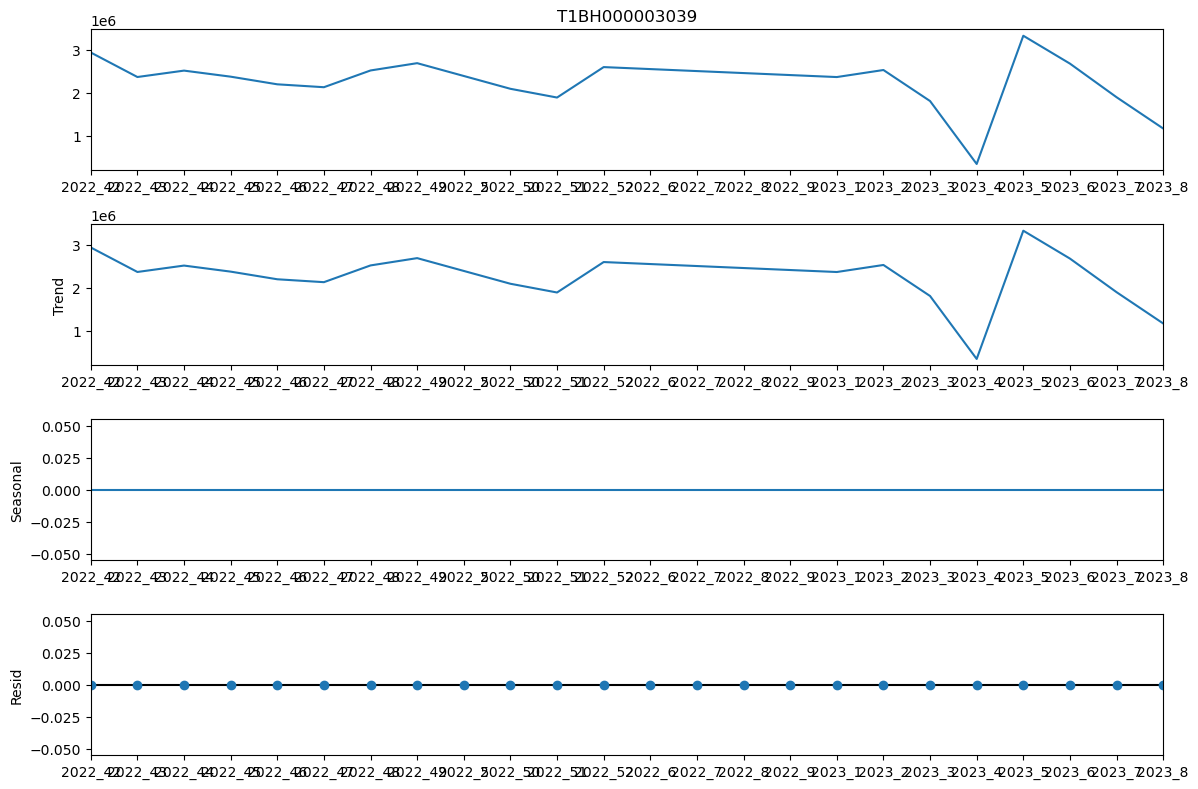

ATMID: T1BH000011116


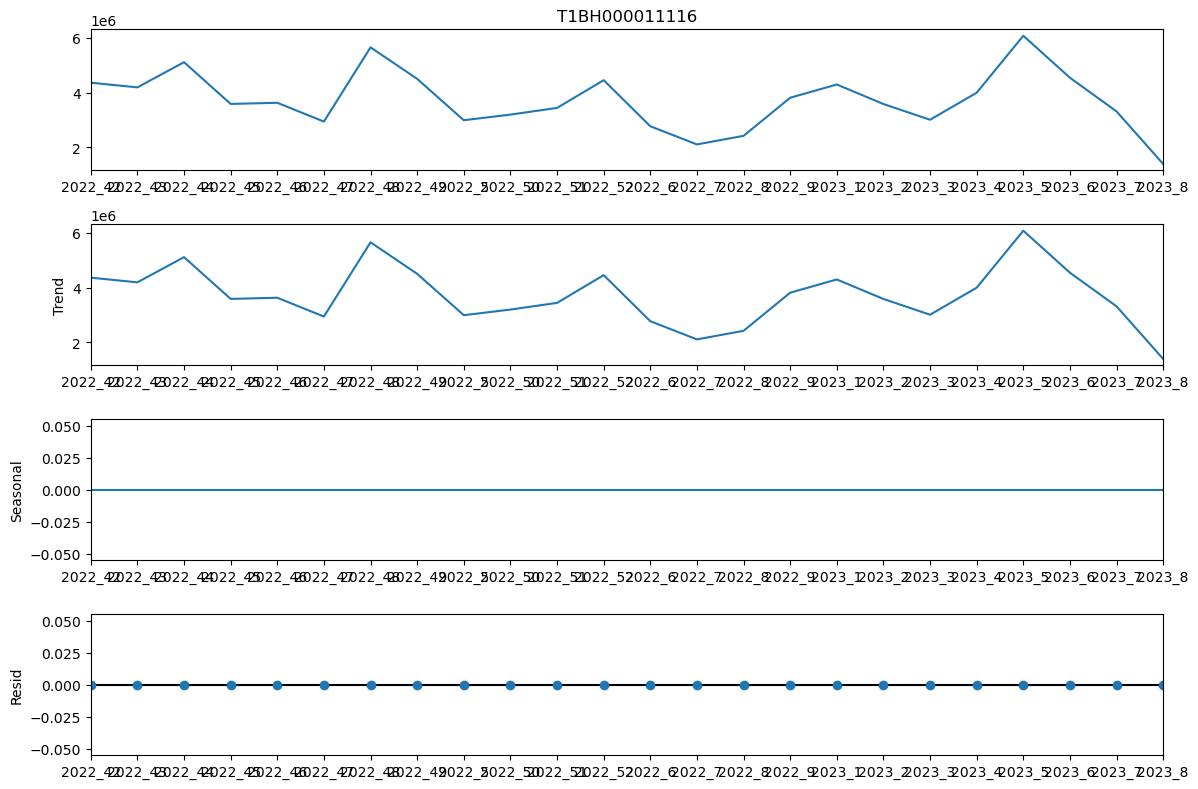

ATMID: T1BH000274012


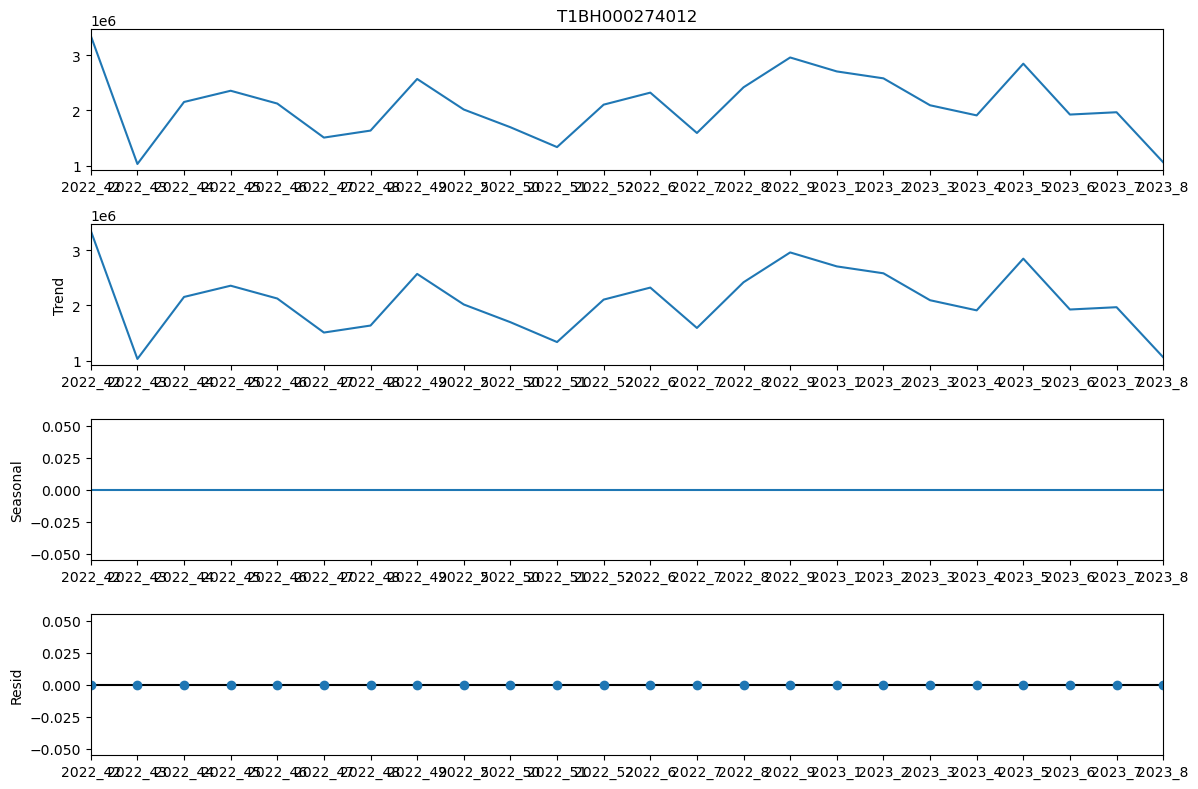

ATMID: T1BH000603091


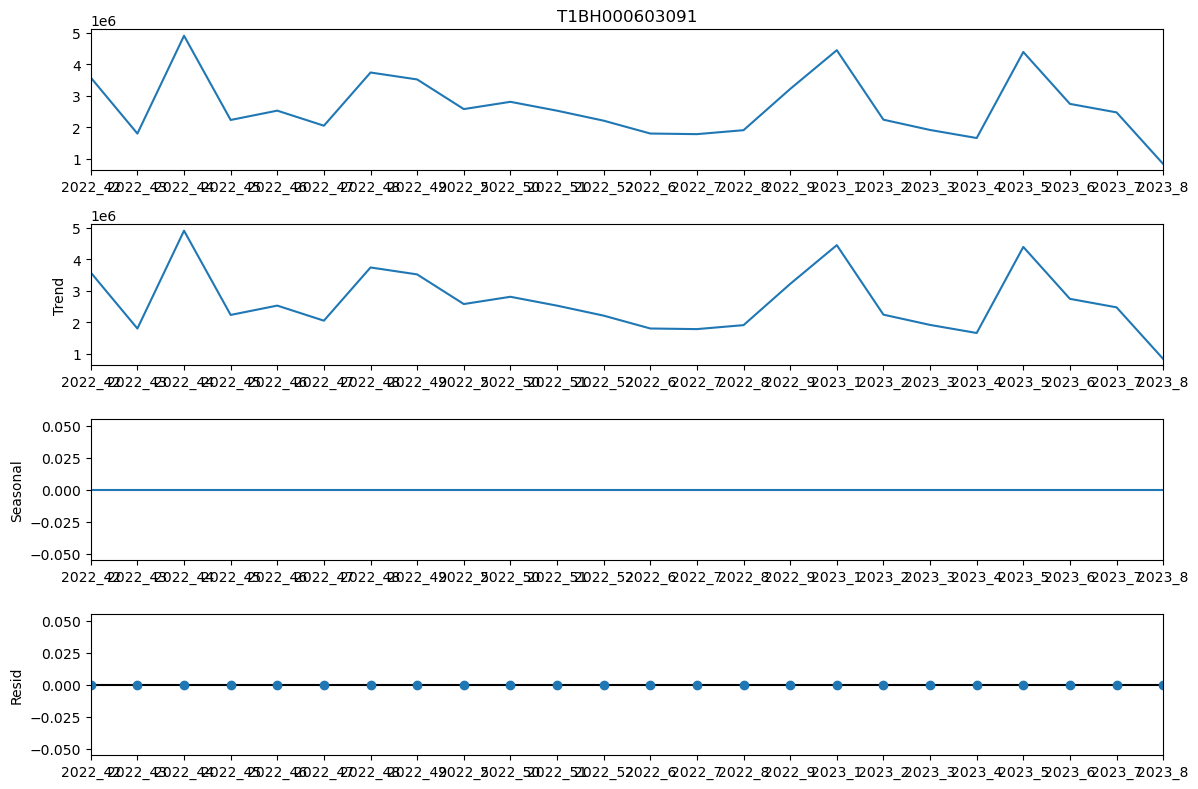

ATMID: T1BH007252090


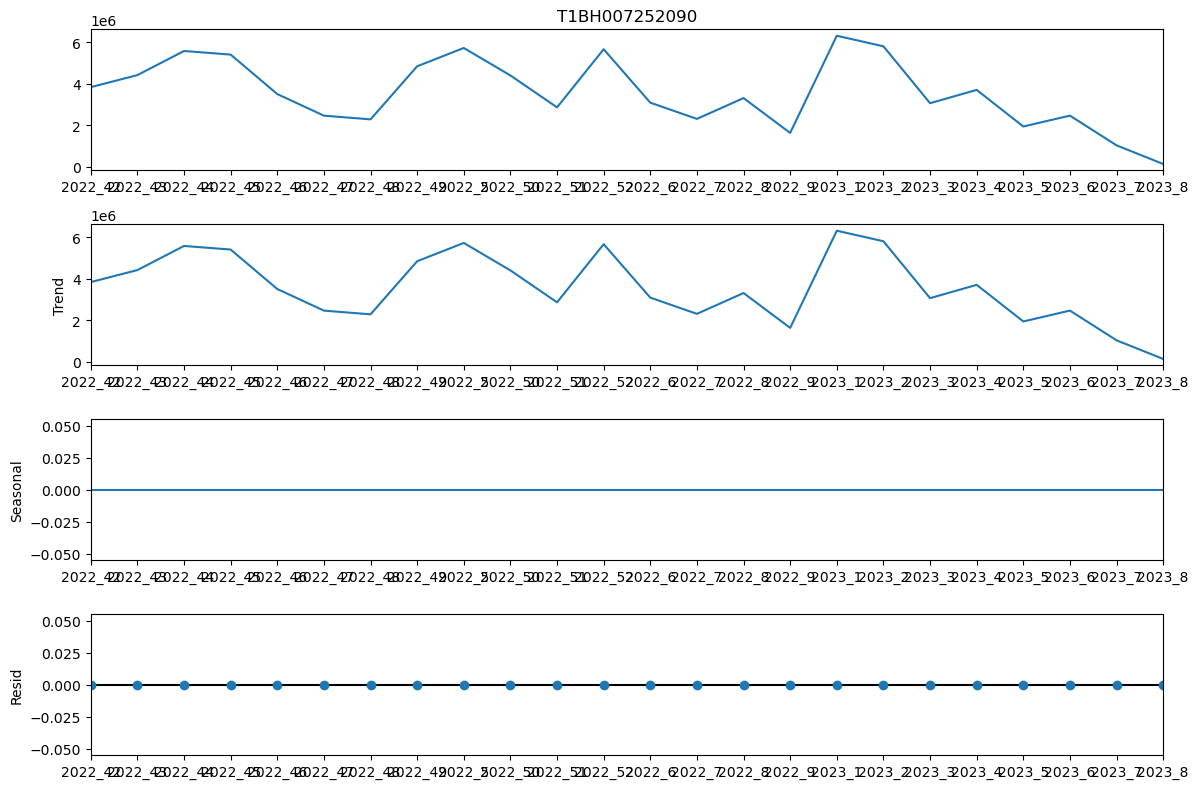

ATMID: T1NH000575414


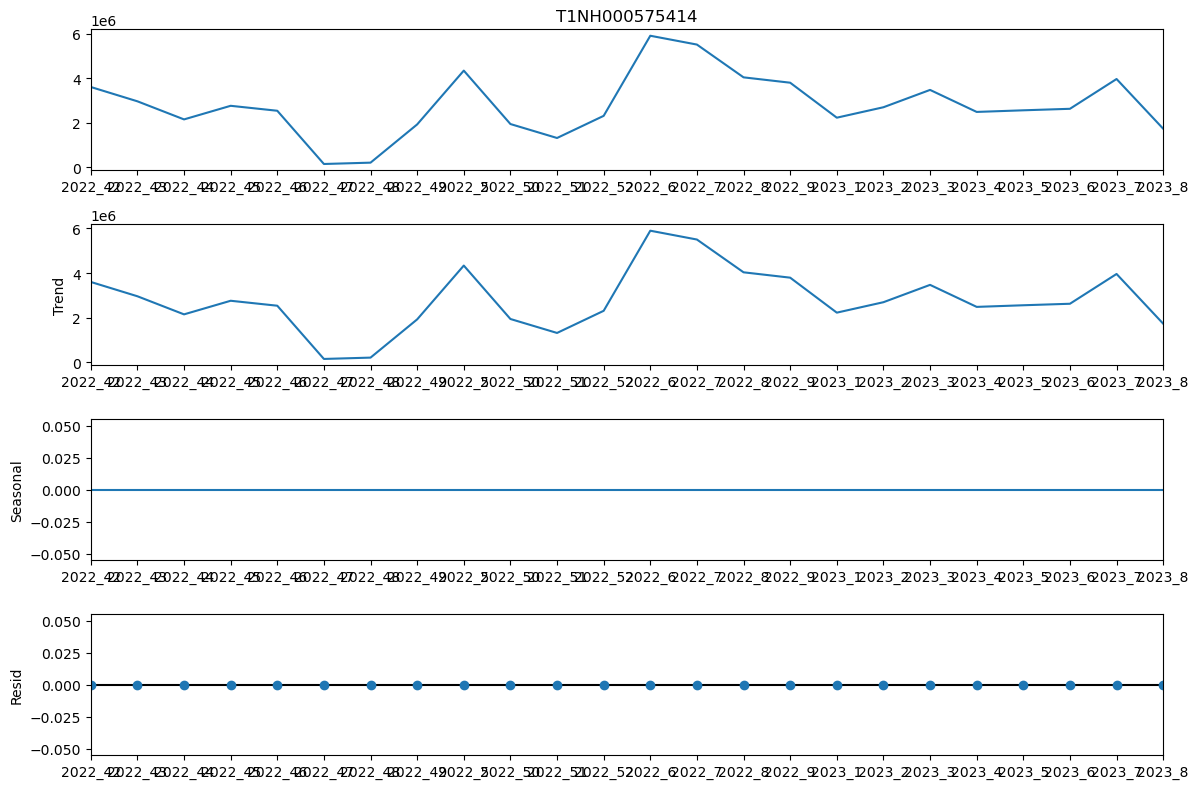

ATMID: T1NY000166081


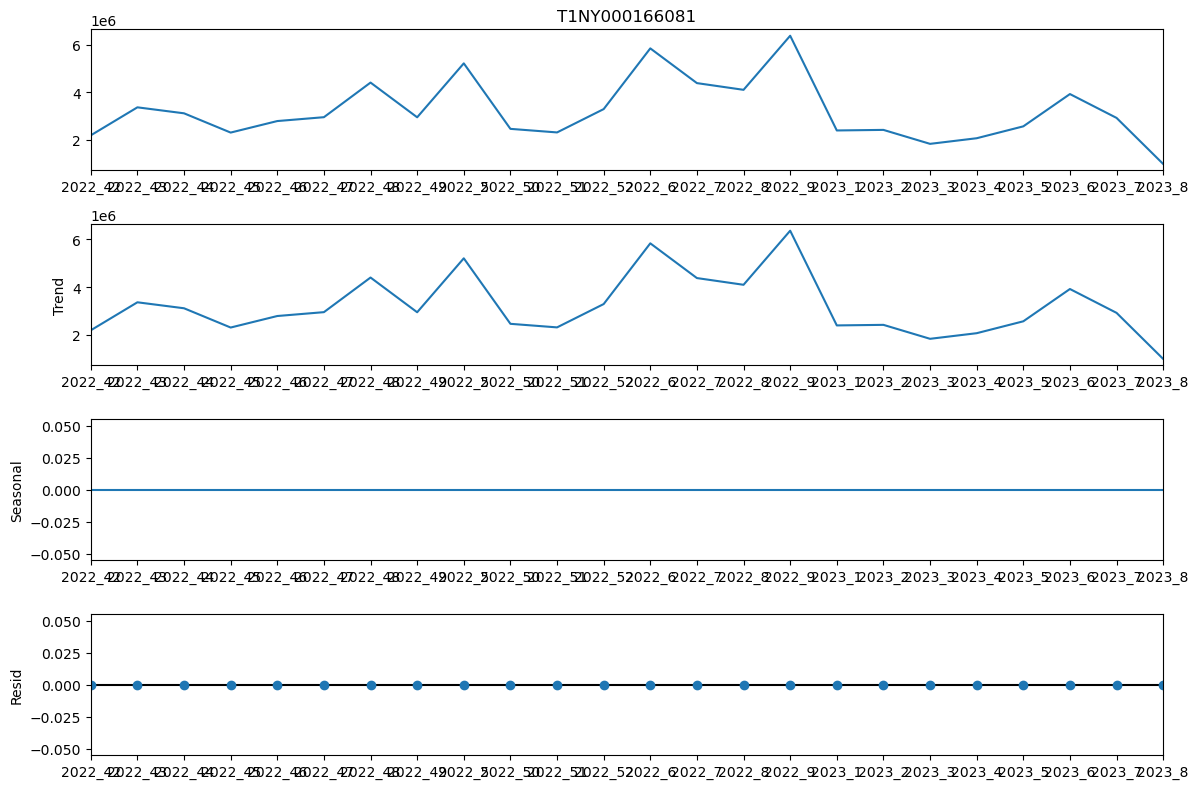

ATMID: TPCN10269


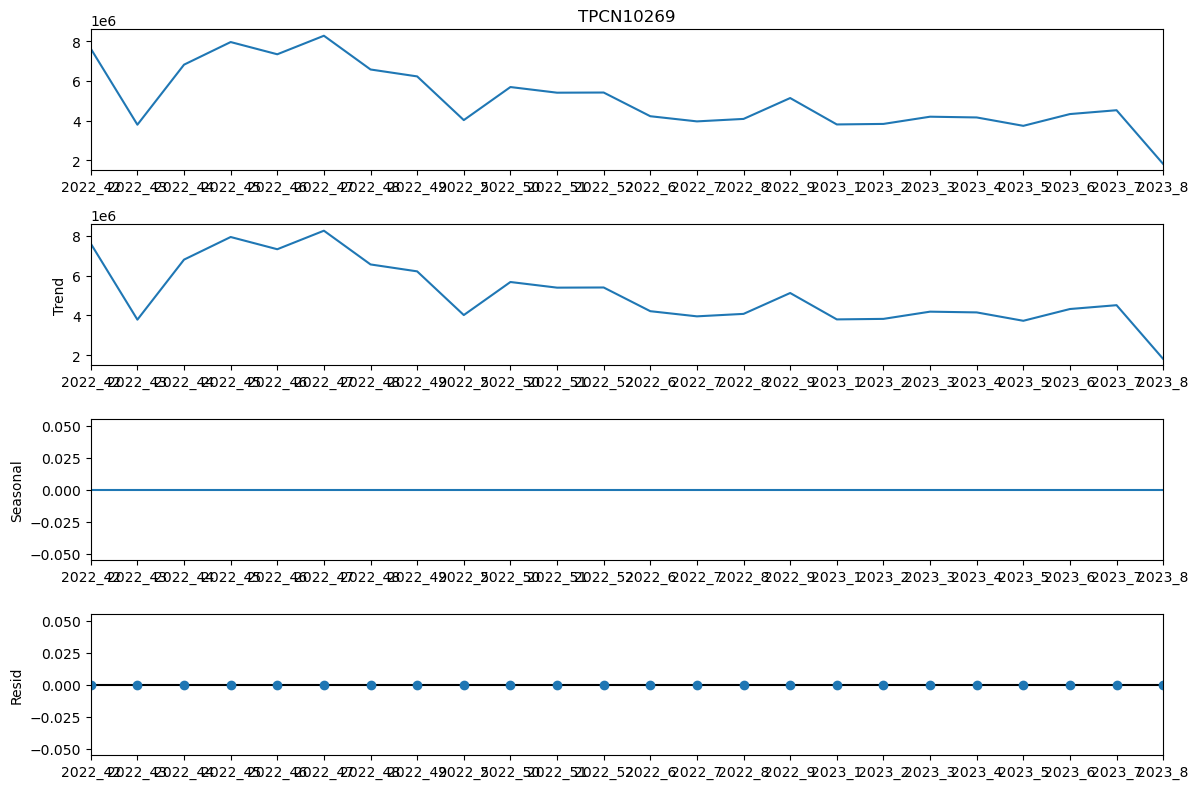

In [38]:
for atm in agg_weeklevel_data['ATMID'].unique():
    try:
        print('ATMID:', atm)
#         tempdata = last_24_week_dispense[agg_weeklevel_data['ATMID'] == atm]
#         tempdata.sort_values(by=['year', 'week'], inplace=True)
        rcParams['figure.figsize'] = 12,8
        decomposiotion = sm.tsa.seasonal_decompose(x=last_24_week_dispense[atm],period=1, model='additive')
        fig = decomposiotion.plot()
        plt.show()
    except Exception as e:
        print(e)
        pass

#### Multiplicative seasonal decomposition

ATMID: APAN11109


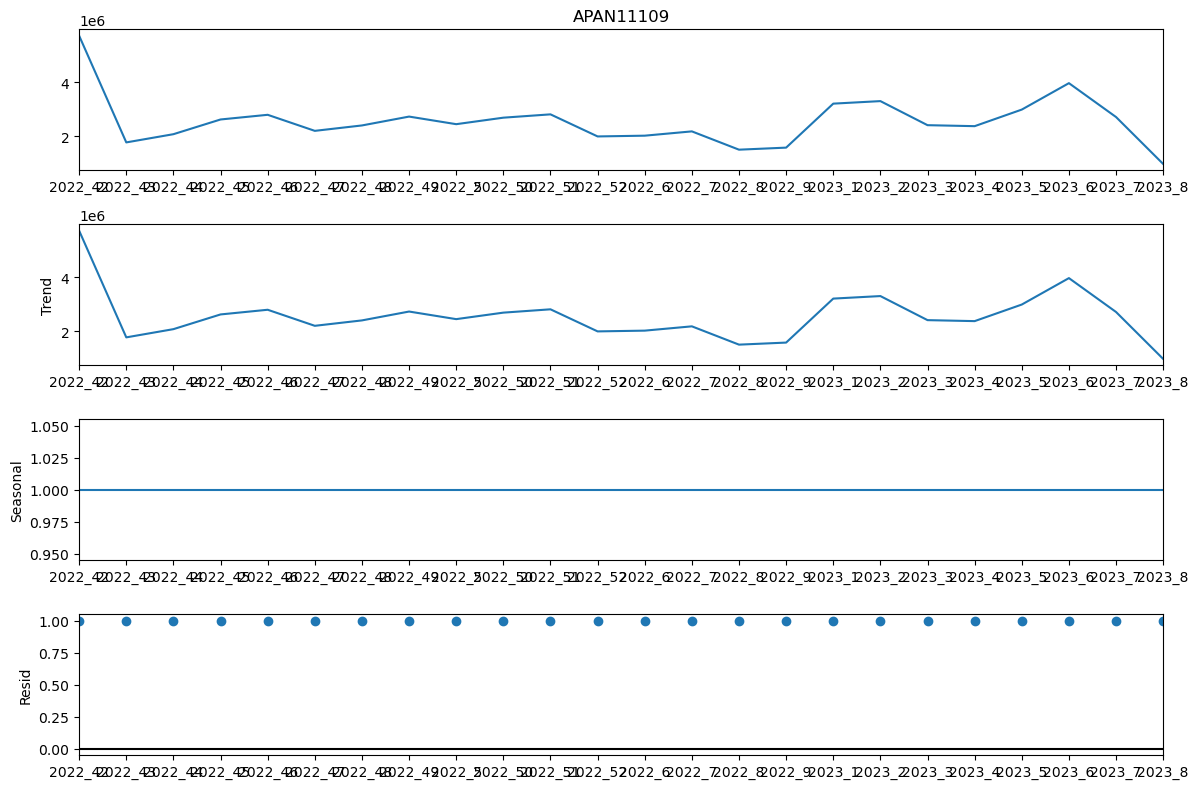

ATMID: APAN22403


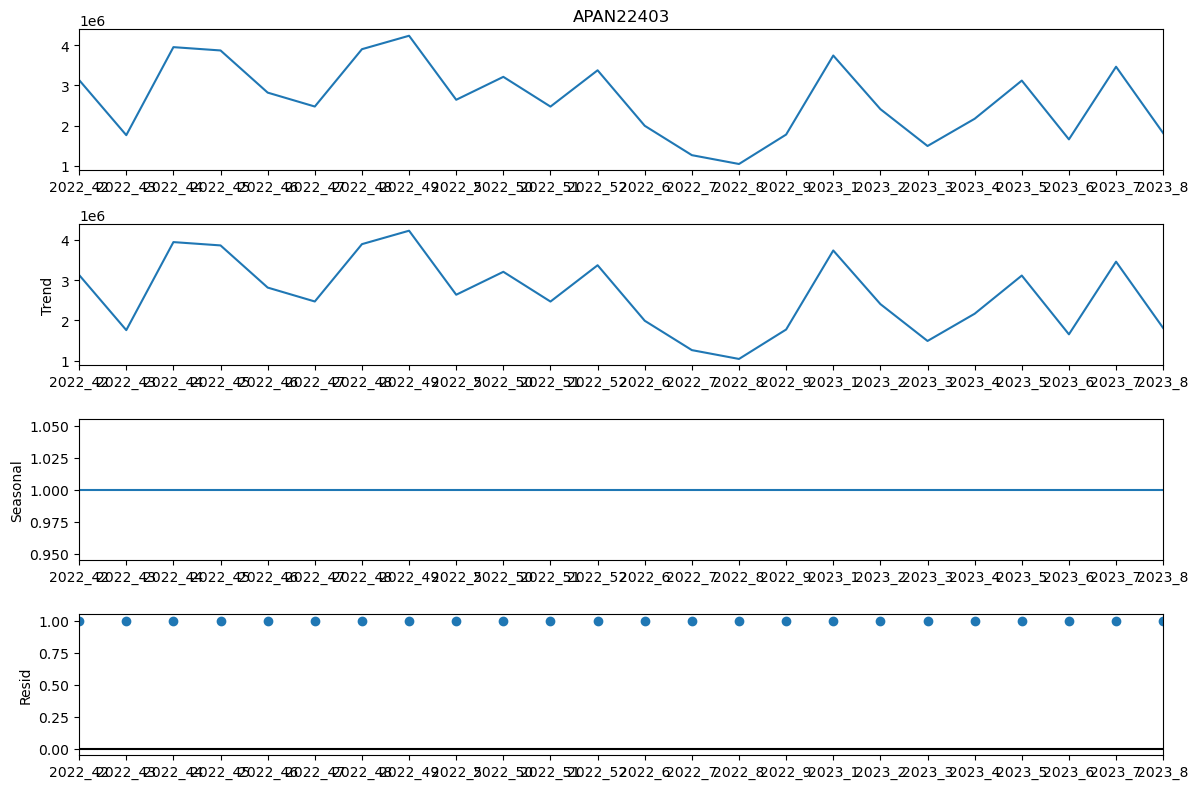

ATMID: APAN23217


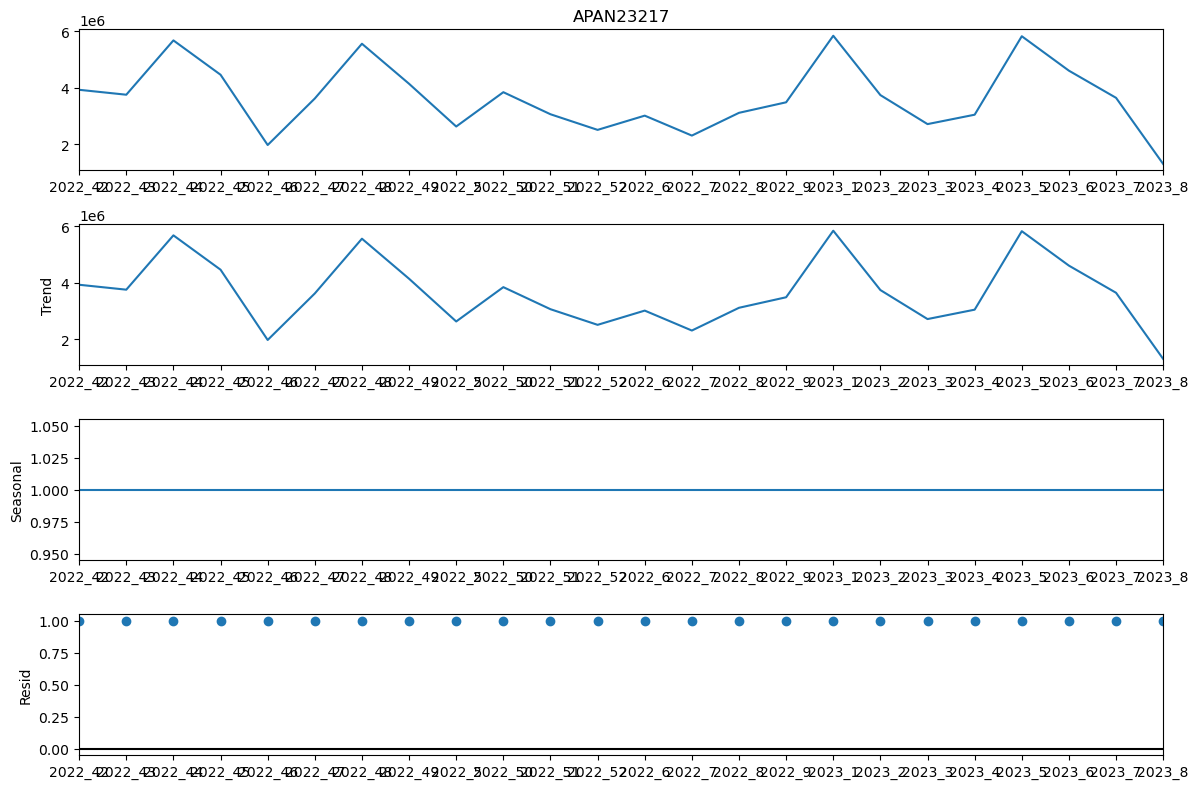

ATMID: APAN35706


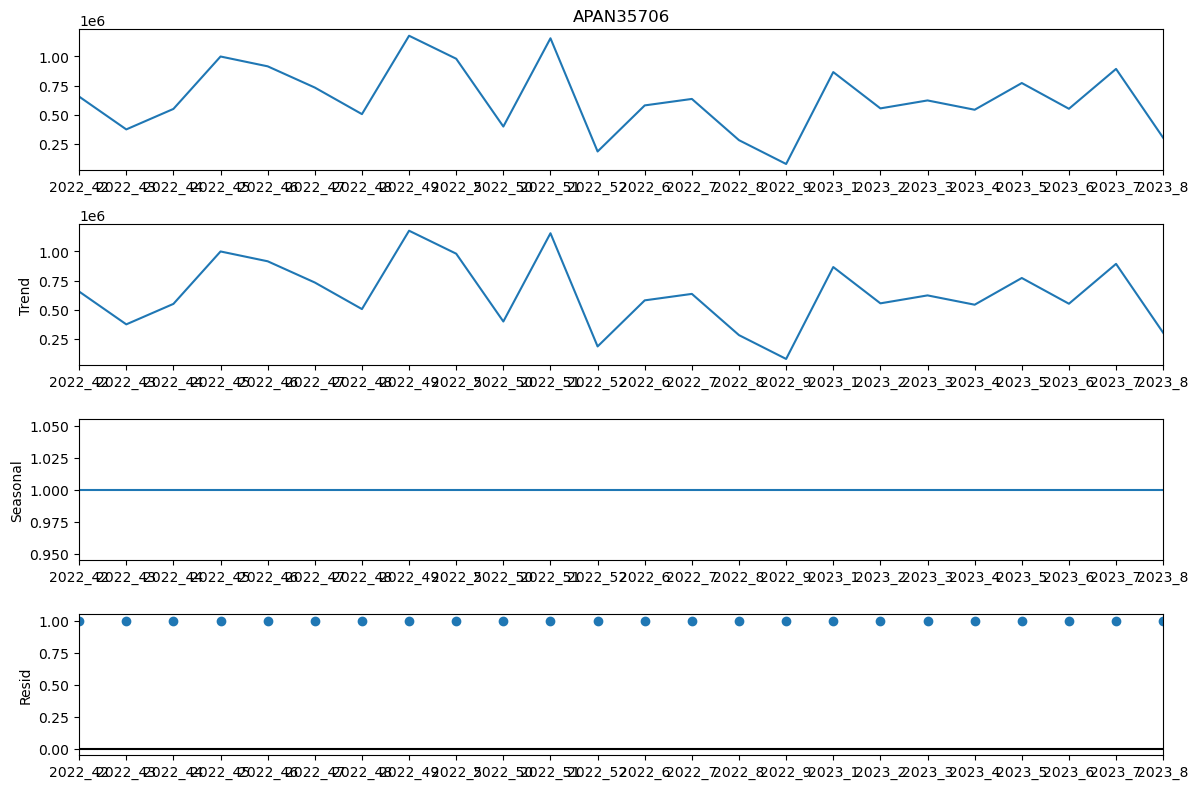

ATMID: APCN00816


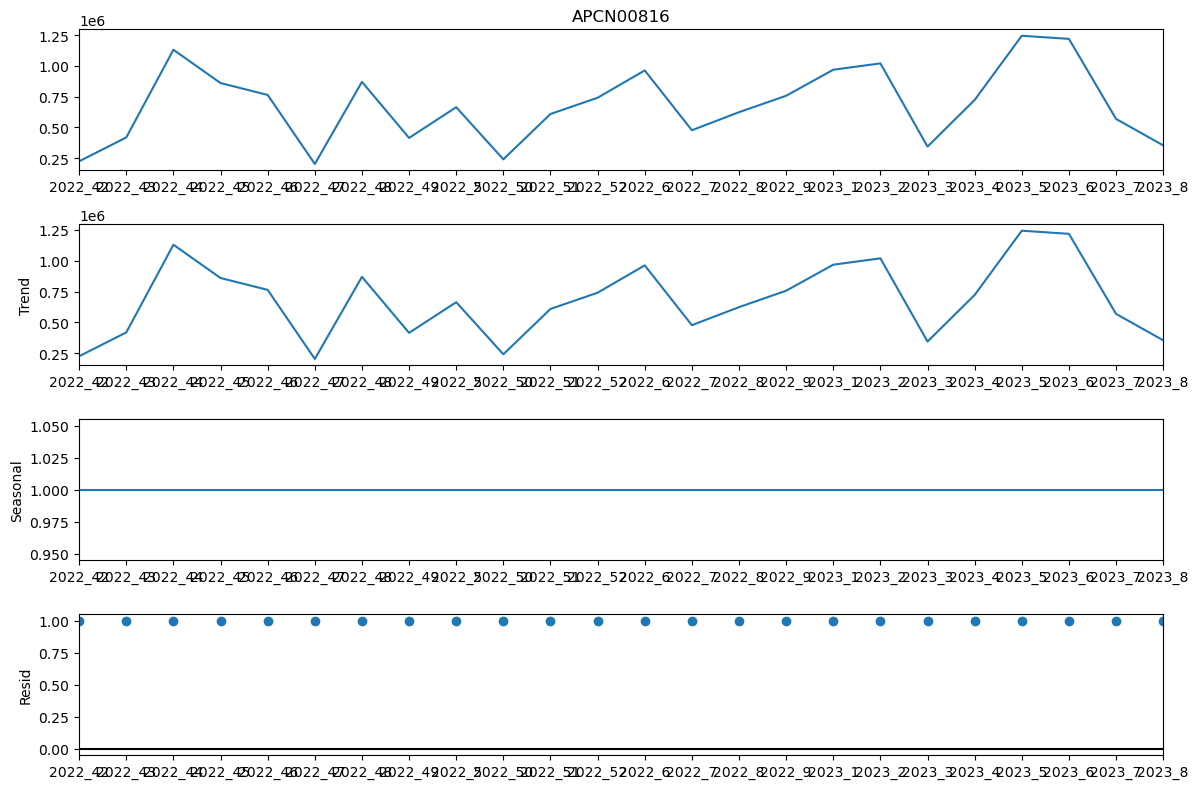

ATMID: S1CN1142
Multiplicative seasonality is not appropriate for zero and negative values
ATMID: S1CN2011


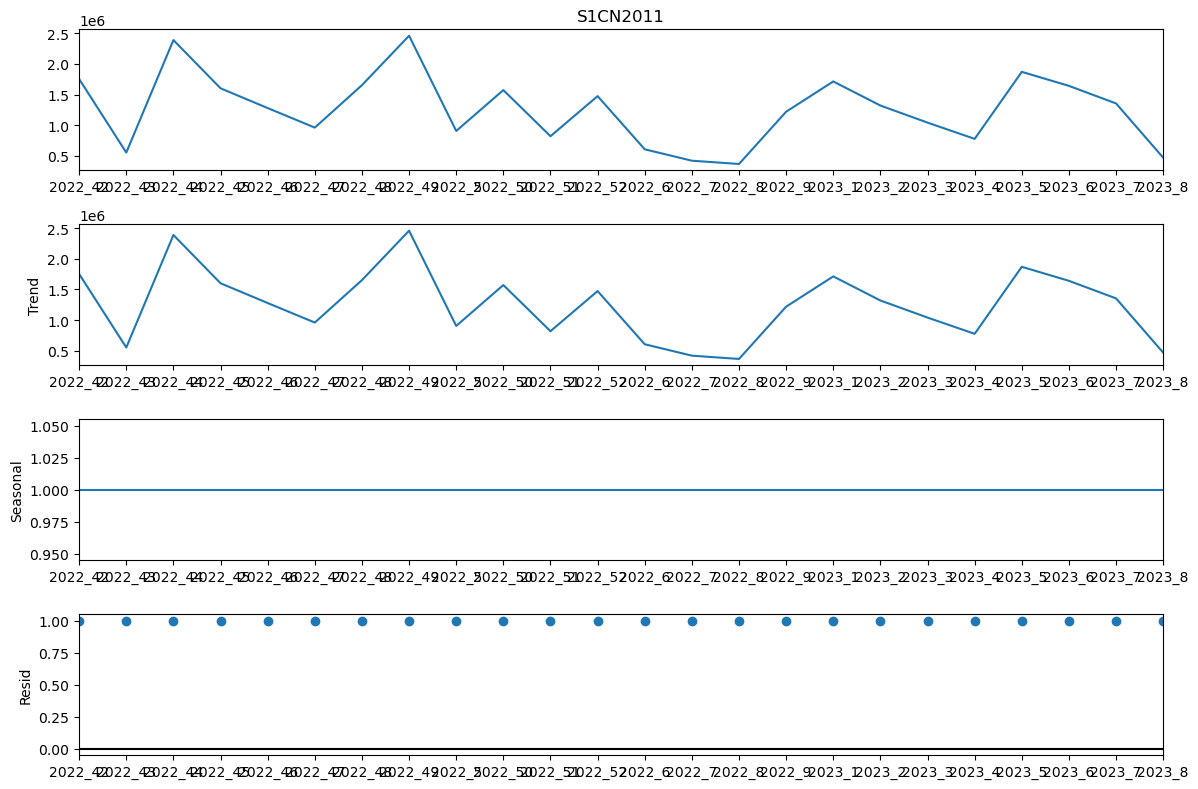

ATMID: S1CN2022


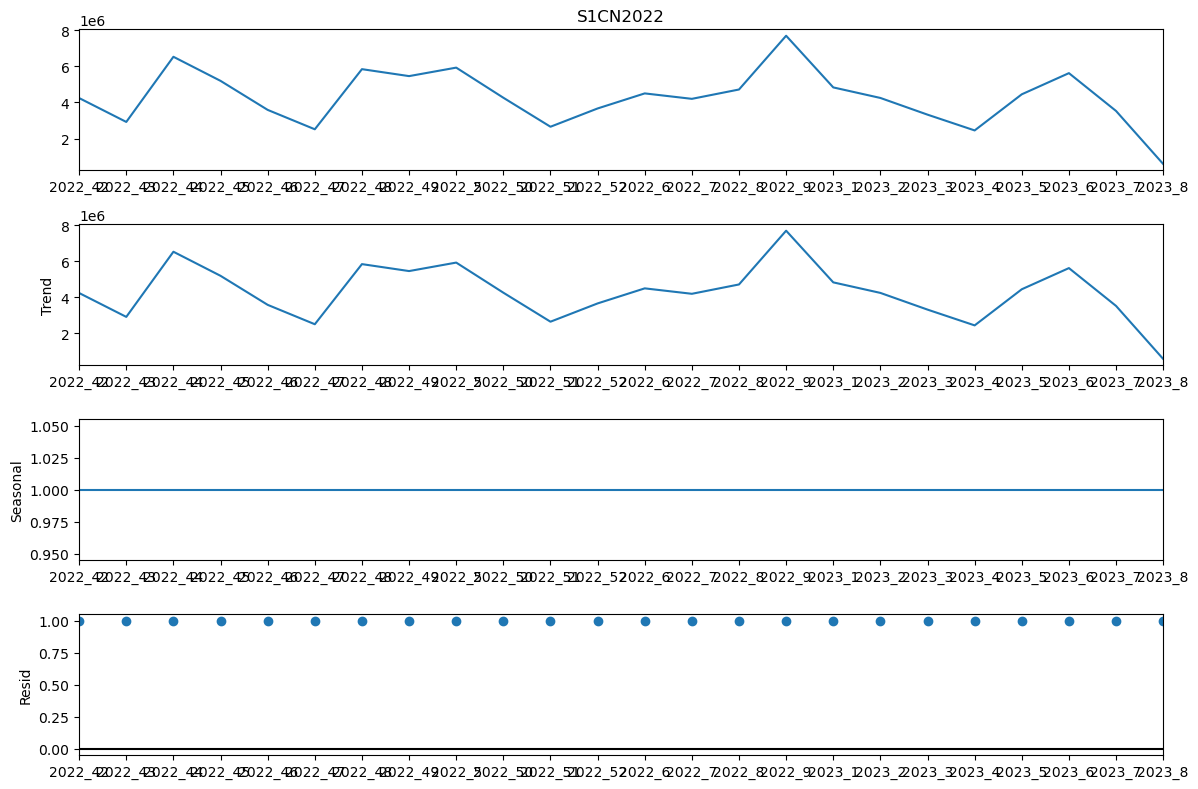

ATMID: S1CN2820
Multiplicative seasonality is not appropriate for zero and negative values
ATMID: S1CN3514


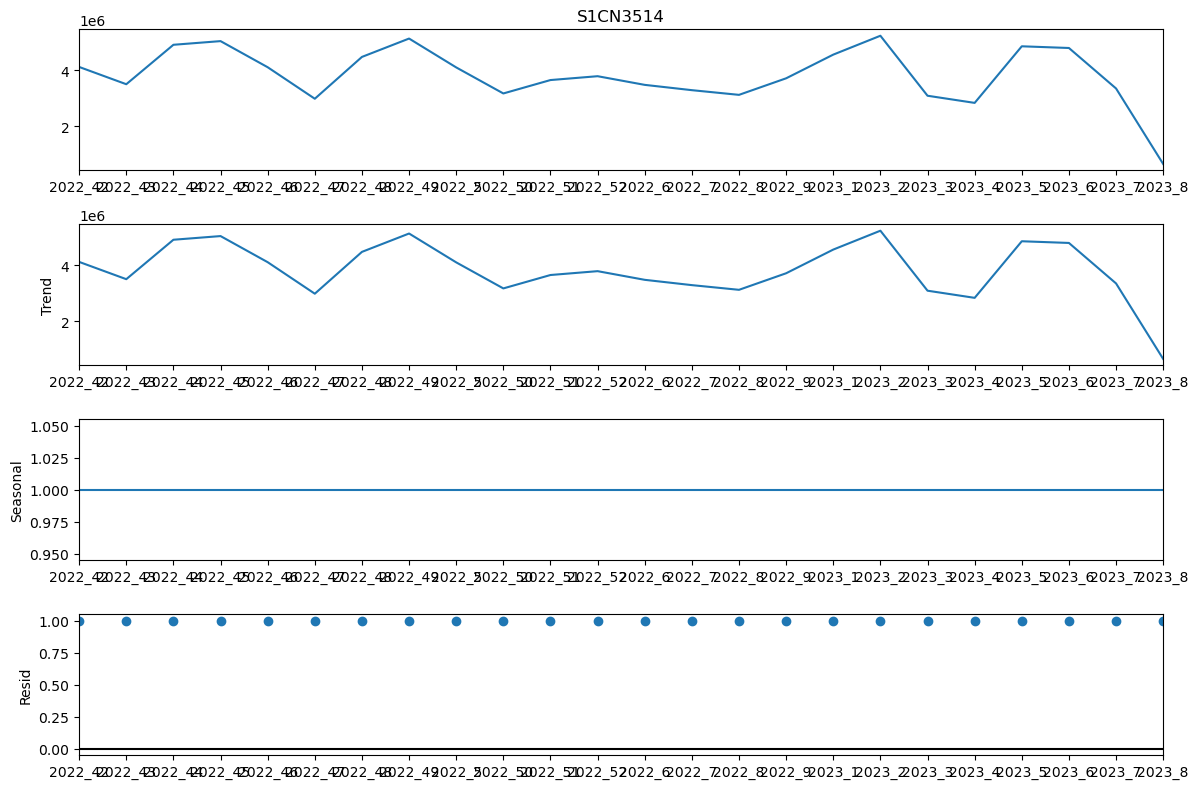

ATMID: SPCN02020


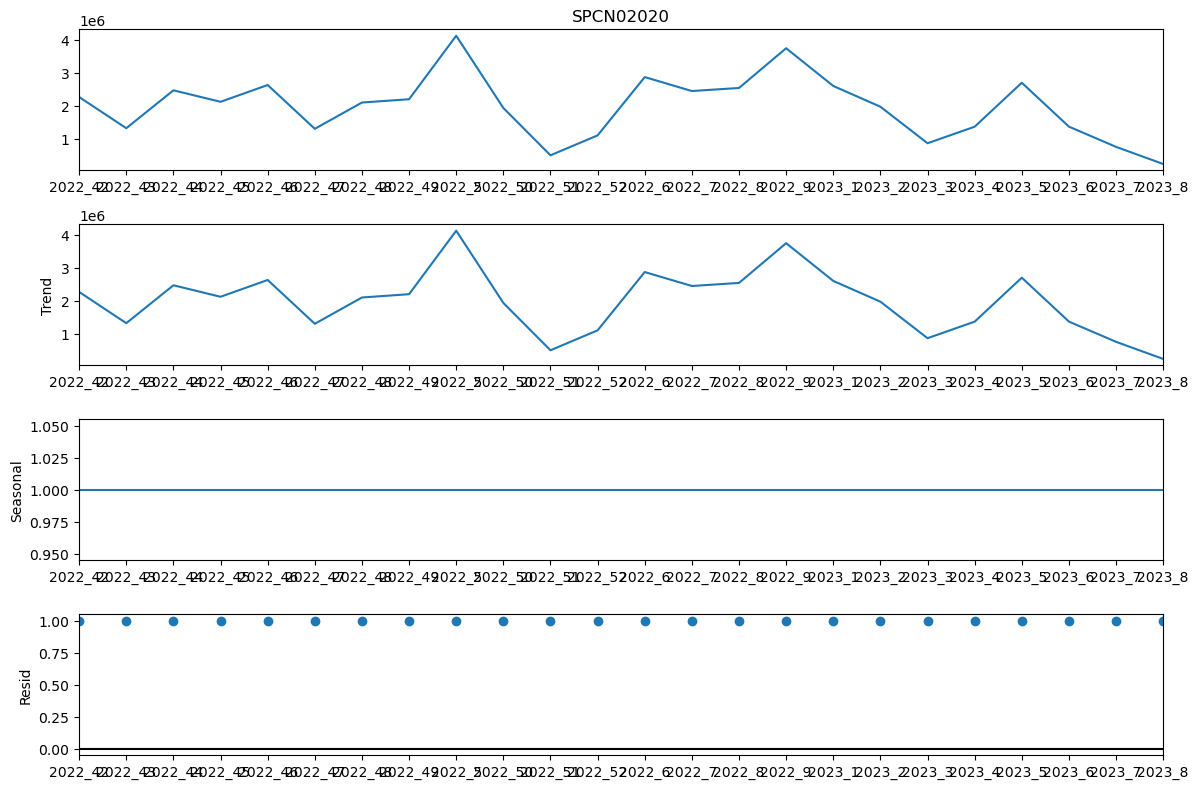

ATMID: SPCND067


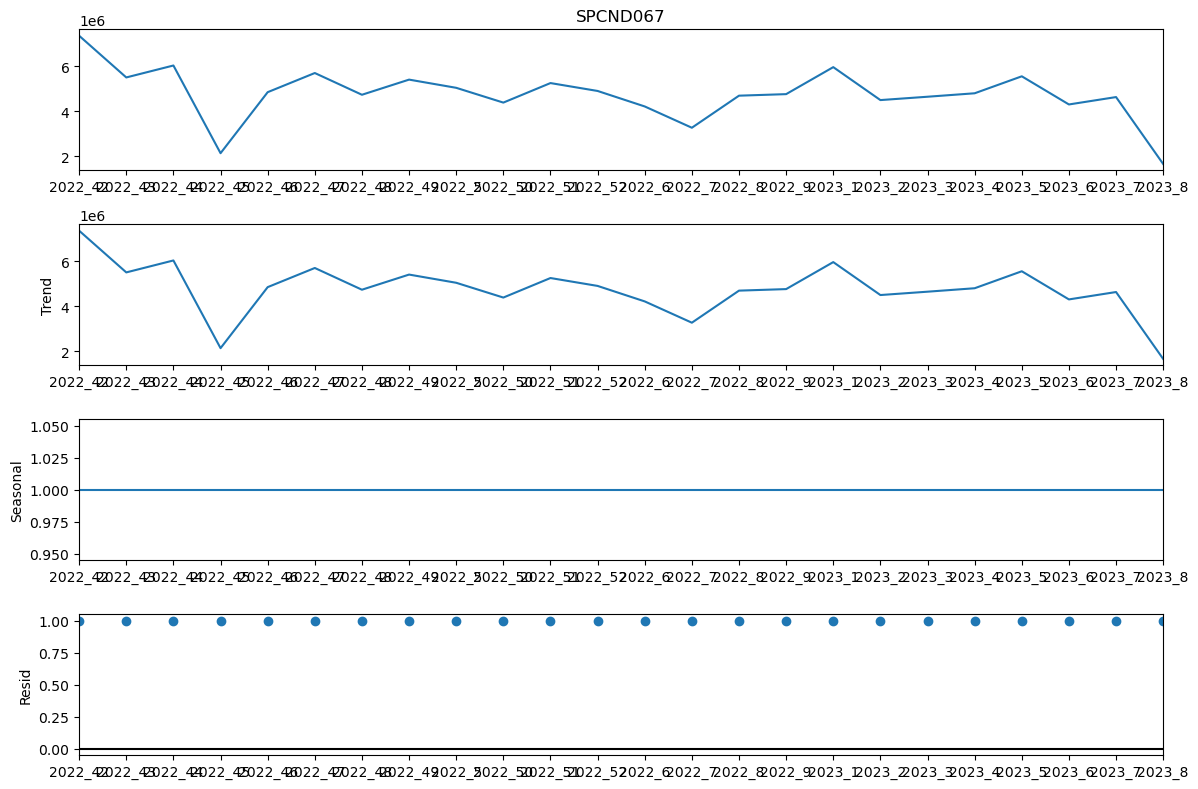

ATMID: SPCNG376


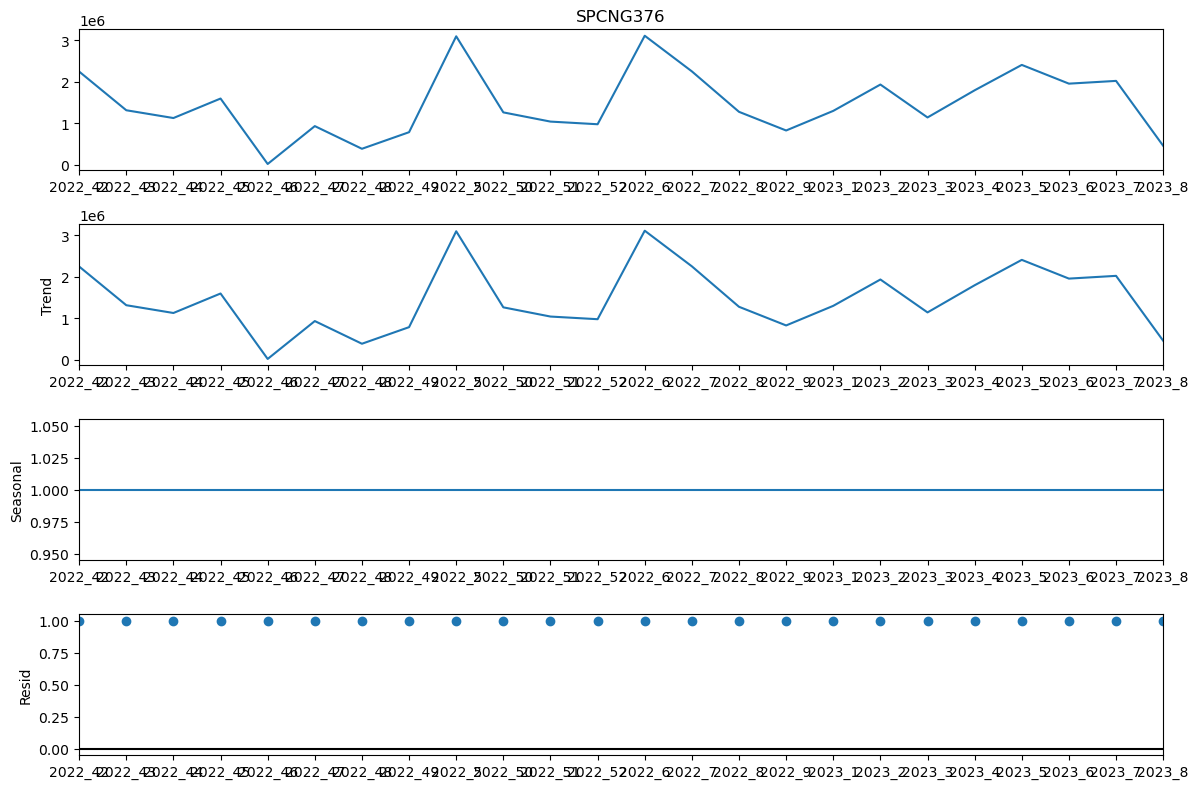

ATMID: T1BH000003039


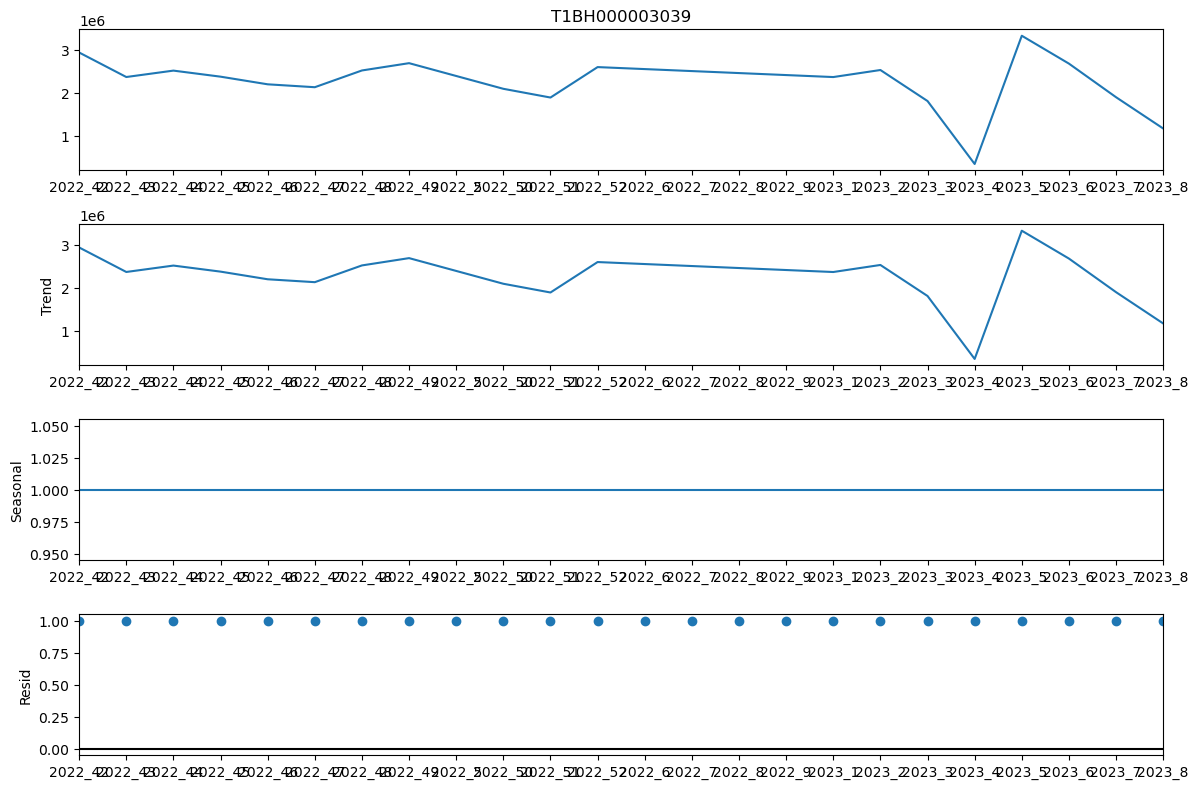

ATMID: T1BH000011116


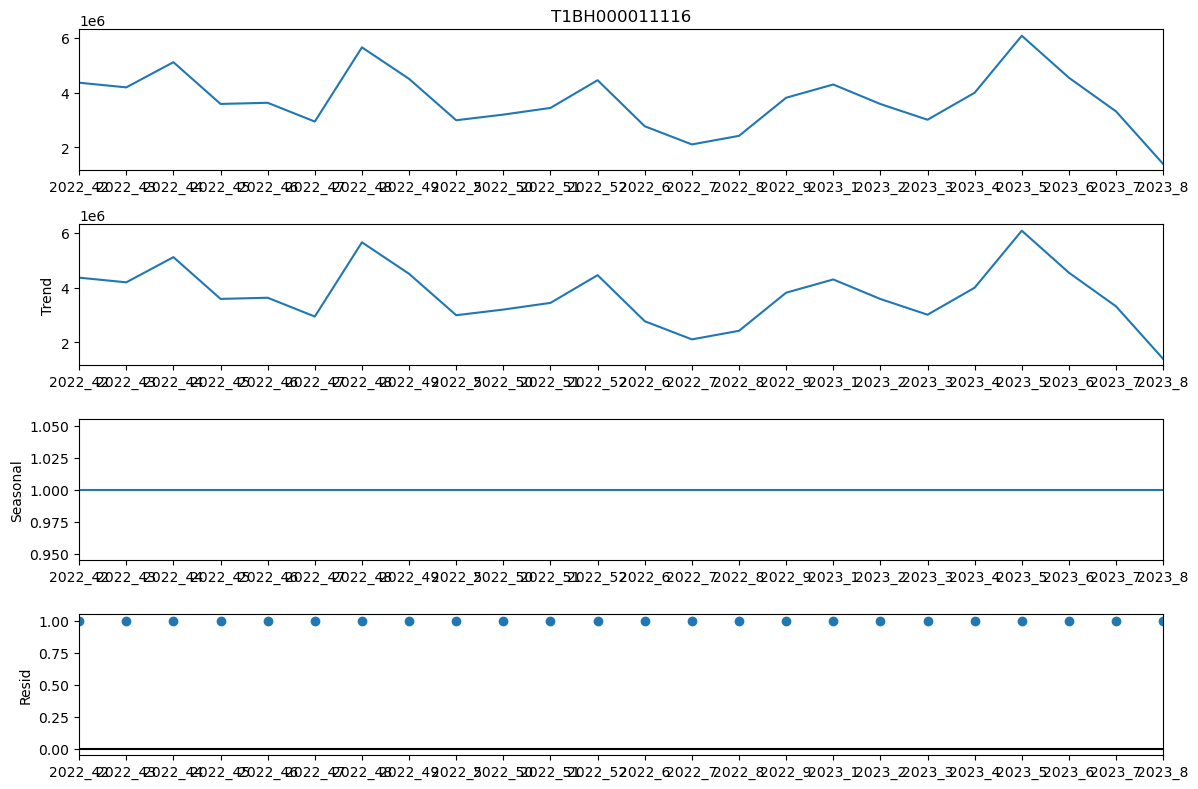

ATMID: T1BH000274012


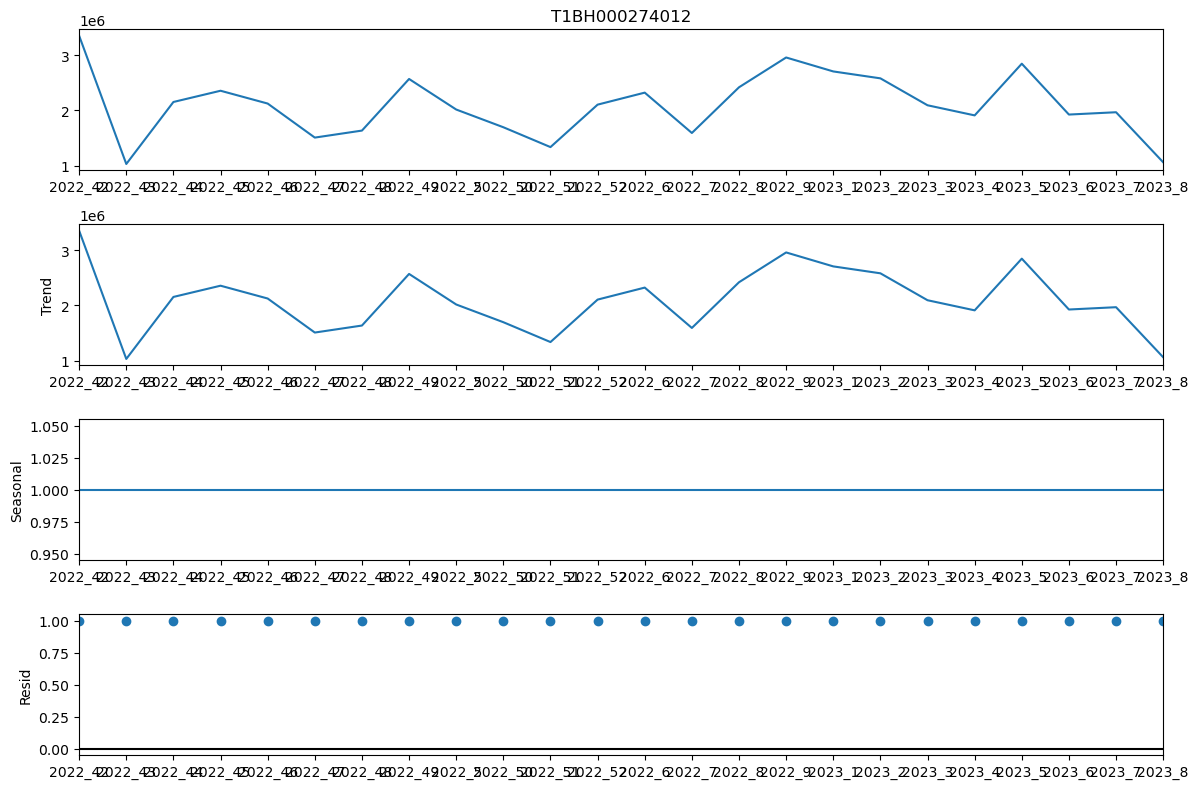

ATMID: T1BH000603091


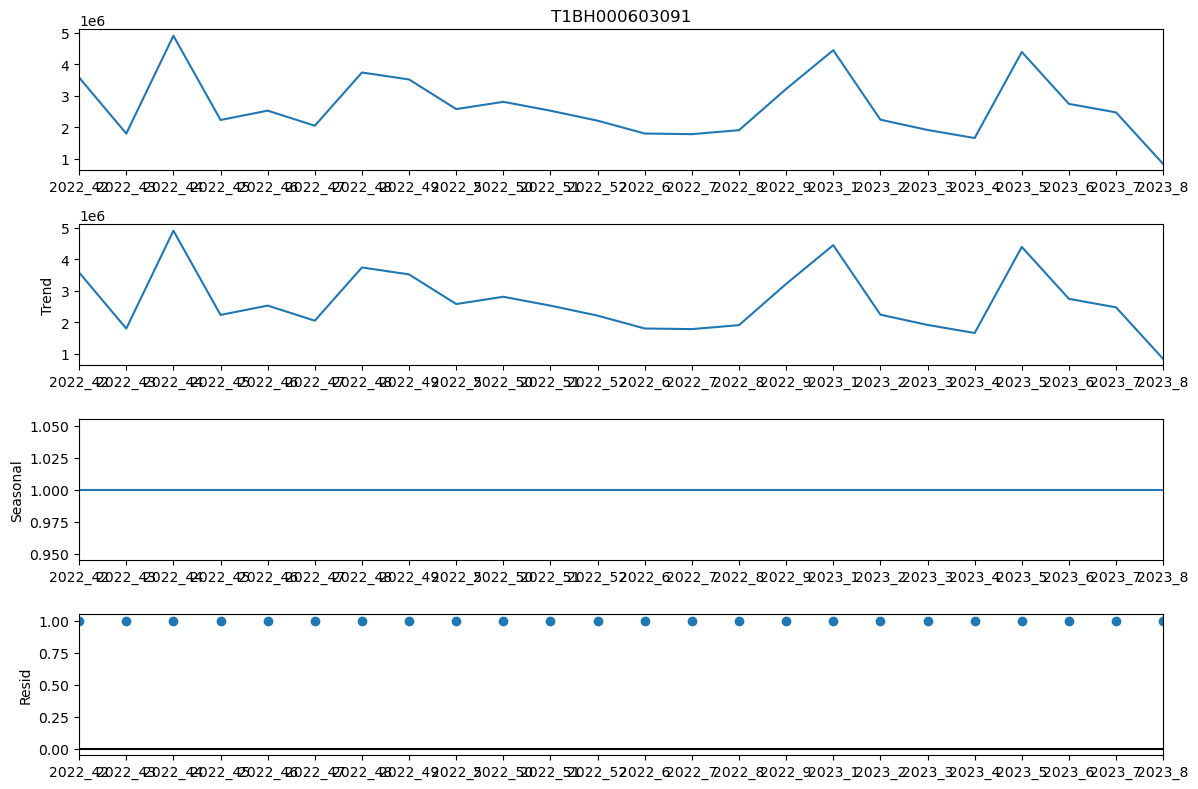

ATMID: T1BH007252090


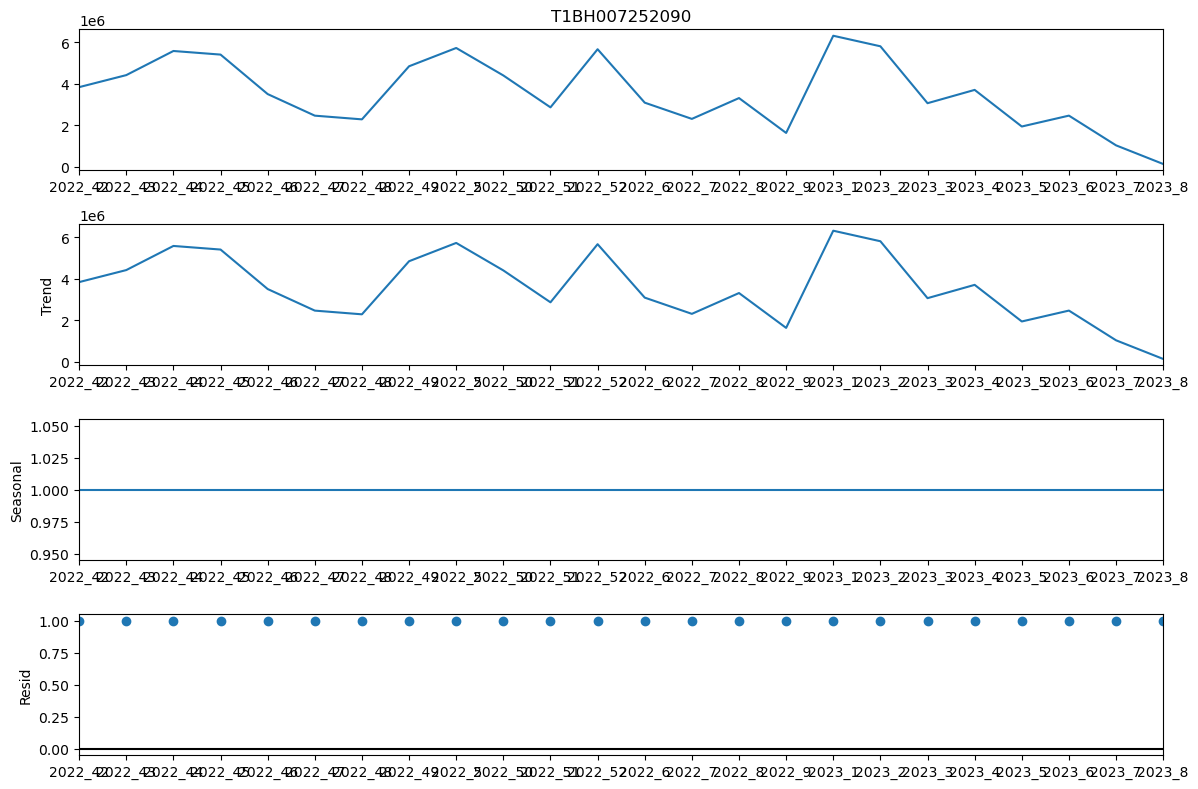

ATMID: T1NH000575414


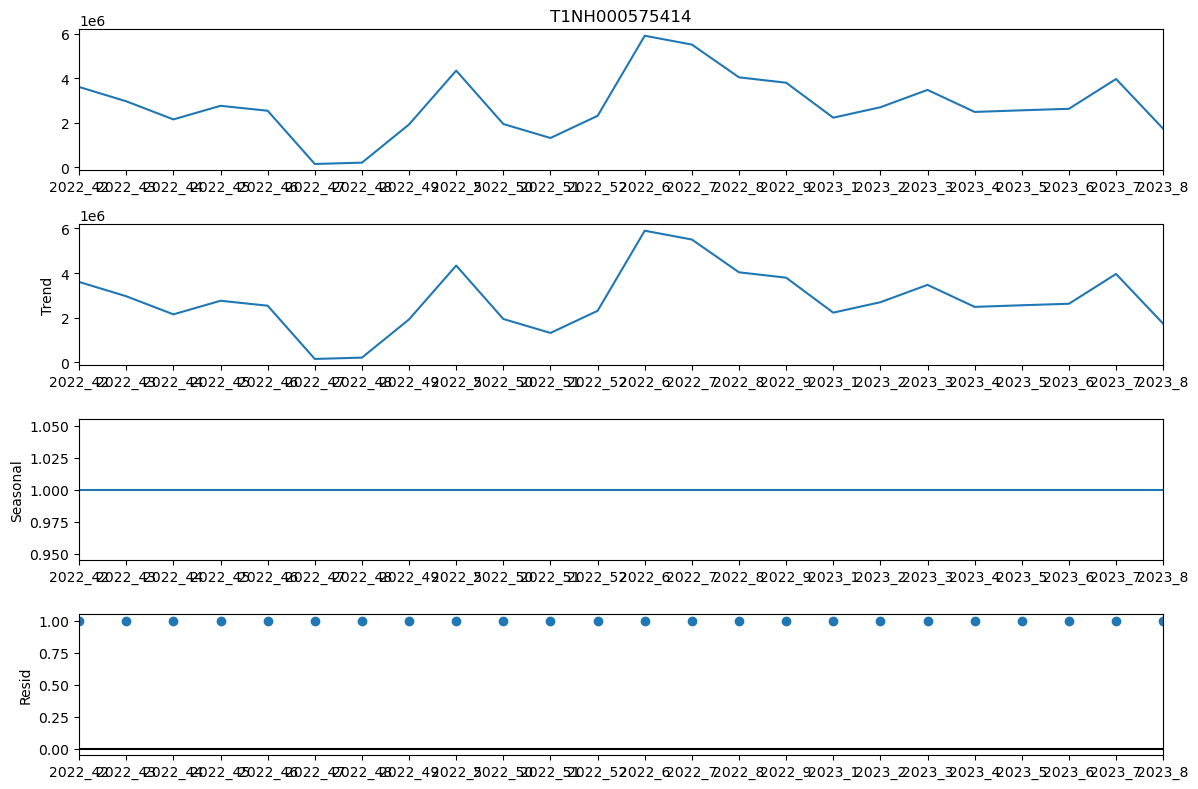

ATMID: T1NY000166081


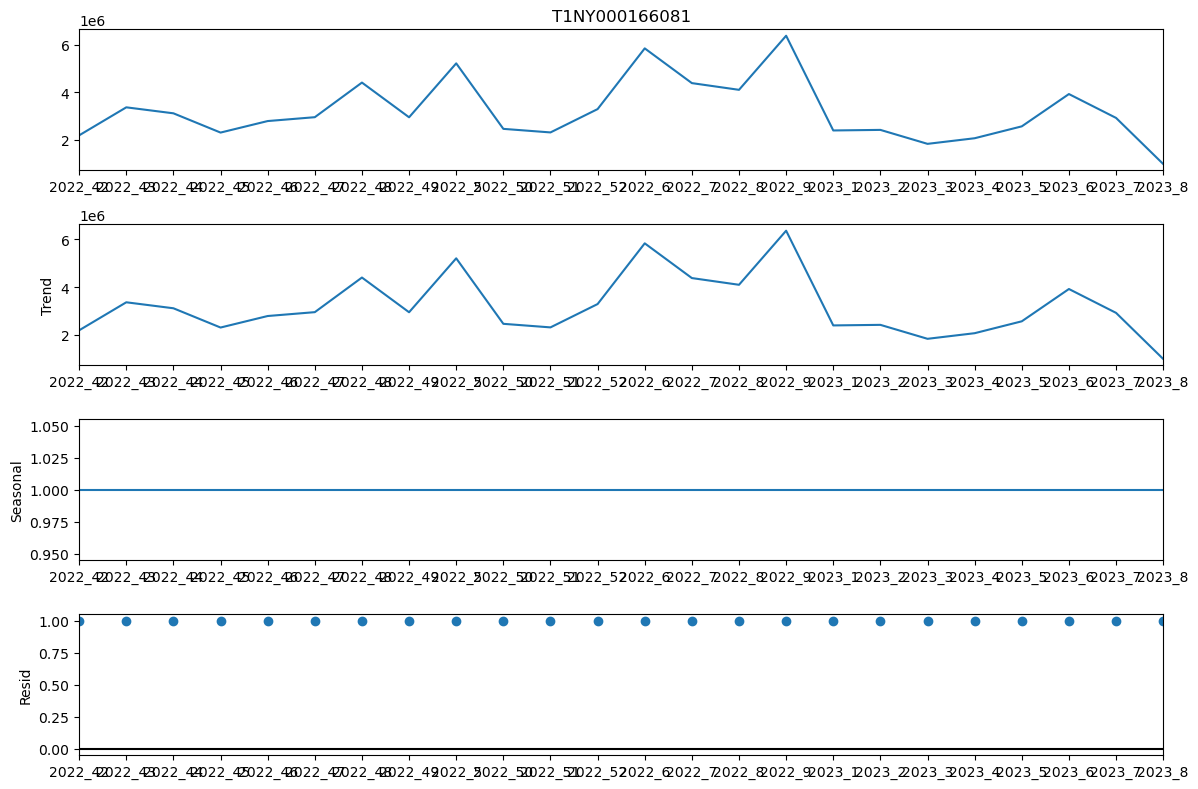

ATMID: TPCN10269


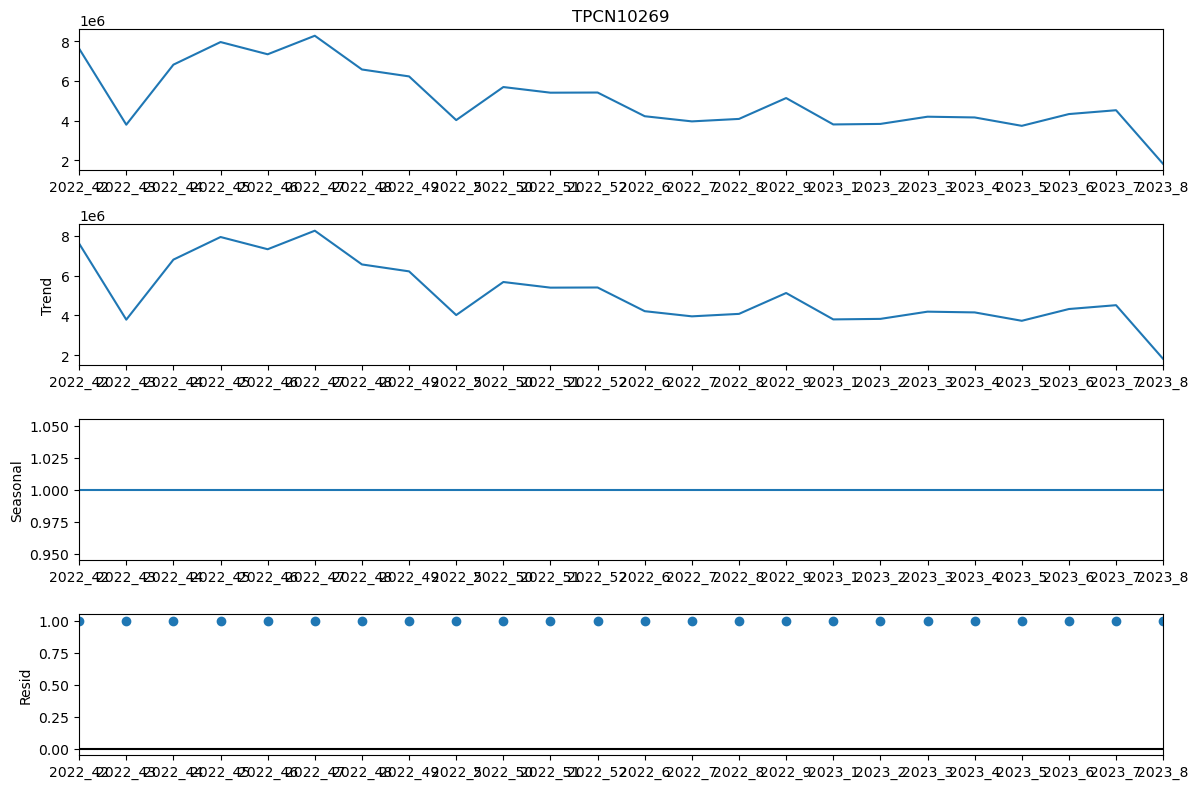

In [39]:
for atm in agg_weeklevel_data['ATMID'].unique():
    try:
        print('ATMID:', atm)
        rcParams['figure.figsize'] = 12,8
        decomposiotion = sm.tsa.seasonal_decompose(x=last_24_week_dispense[atm],period=1, model='multiplicative')
        fig = decomposiotion.plot()
        plt.show()
    except Exception as e:
        print(e)
        pass

No seasonal pattern and trend is seen

In [113]:
# for atm in agg_weeklevel_data['ATMID'].unique():
atm_week_wise_dispense['year_week'] = atm_week_wise_dispense.index
atm_week_wise_dispense

Dispense                                                        \
ATMID        APAN11109  APAN22403  APAN23217 APAN35706  APCN00816   S1CN1142   
unique_week                                                                    
2021_1       1767500.0  2499300.0  2830300.0  224200.0   605100.0  2461500.0   
2021_10       993500.0  2674400.0  1864400.0       0.0   876900.0  2674000.0   
2021_11      2202000.0  3008000.0  2312600.0  162600.0   404600.0  1785500.0   
2021_12      1304500.0  3011500.0  2599600.0  458600.0   678900.0  2200500.0   
2021_13      1510000.0  4956600.0  3604500.0  515000.0   750400.0  3382000.0   
...                ...        ...        ...       ...        ...        ...   
2023_4       2377500.0  2167500.0  3049900.0  542700.0   722500.0   325500.0   
2023_5       2991000.0  3116500.0  5831400.0  772000.0  1244000.0   805000.0   
2023_6       3969000.0  1655500.0  4610500.0  551000.0  1218500.0   441500.0   
2023_7       2715000.0  3461000.0  3648200.0  893200.0   568500.0   902500.0   
2023_8        978000.0  1811000.0  1303100.0  301800.0   354000.0   202000.0   

                                                         ...             \
ATMID         S1CN2011   S1CN2022   S1CN2820   S1CN3514  ...   SPCNG376   
unique_week                                              ...              
2021_1             NaN  9030700.0  2340600.0  3336500.0  ...  1934500.0   
2021_10            NaN  7760700.0  2435900.0  3218000.0  ...  3771500.0   
2021_11            NaN  5480600.0  2068700.0  2441500.0  ...  3388000.0   
2021_12            NaN  5029000.0  2202800.0  3235500.0  ...  3927500.0   
2021_13            NaN  6730300.0  2653500.0  2131000.0  ...  3229000.0   
...                ...        ...        ...        ...  ...        ...   
2023_4        778500.0  2447600.0  2073500.0  2842000.0  ...  1795500.0   
2023_5       1869400.0  4450600.0  3613000.0  4864000.0  ...  2409000.0   
2023_6       1641200.0  5623700.0  4400000.0  4803500.0  ...  1956000.0   
2023_7       1355100.0  3526200.0  1756000.0  3357000.0  ...  2022500.0   
2023_8        472200.0   587100.0        0.0   659000.0  ...   454000.0   

                                                                     \
ATMID       T1BH000003039 T1BH000011116 T1BH000274012 T1BH000603091   
unique_week                                                           
2021_1                NaN           NaN           NaN           NaN   
2021_10               NaN           NaN           NaN           NaN   
2021_11               NaN           NaN           NaN           NaN   
2021_12               NaN           NaN           NaN           NaN   
2021_13               NaN           NaN           NaN           NaN   
...                   ...           ...           ...           ...   
2023_4           338500.0     3994400.0     1909100.0     1658000.0   
2023_5          3325000.0     6077700.0     2843700.0     4393000.0   
2023_6          2676000.0     4542500.0     1924200.0     2743000.0   
2023_7          1893500.0     3311700.0     1966000.0     2473000.0   
2023_8          1165000.0     1389400.0     1061200.0      833000.0   

                                                                 year_week  
ATMID       T1BH007252090 T1NH000575414 T1NY000166081  TPCN10269            
unique_week                                                                 
2021_1                NaN           NaN     9505200.0  4621500.0    2021_1  
2021_10               NaN           NaN     5461400.0  4538500.0   2021_10  
2021_11               NaN           NaN     6661600.0  5108500.0   2021_11  
2021_12               NaN           NaN     4292500.0  5356000.0   2021_12  
2021_13               NaN           NaN     6220100.0  5200500.0   2021_13  
...                   ...           ...           ...        ...       ...  
2023_4          3704300.0     2482500.0     2063500.0  4155100.0    2023_4  
2023_5          1942000.0     2555500.0     2562900.0  3733200.0    2023_5  


### Stationarity Test

#### Augmented Dickey-Fuller (ADF) test

In [40]:
from statsmodels.tsa.stattools import adfuller
for atm in agg_weeklevel_data['ATMID'].unique():
    adf_test = adfuller(last_24_week_dispense[atm])
    print(atm)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])

APAN11109
ADF Statistic: -1.670629
Critical Values @ 0.05: -3.04
p-value: 0.446305
APAN22403
ADF Statistic: -3.833095
Critical Values @ 0.05: -3.00
p-value: 0.002586
APAN23217
ADF Statistic: -2.154394
Critical Values @ 0.05: -3.07
p-value: 0.223212
APAN35706
ADF Statistic: -5.160633
Critical Values @ 0.05: -3.00
p-value: 0.000011
APCN00816
ADF Statistic: -0.862591
Critical Values @ 0.05: -3.05
p-value: 0.800042
S1CN1142
ADF Statistic: -3.078980
Critical Values @ 0.05: -3.00
p-value: 0.028148
S1CN2011
ADF Statistic: -3.228758
Critical Values @ 0.05: -3.10
p-value: 0.018379
S1CN2022
ADF Statistic: -1.398012
Critical Values @ 0.05: -3.10
p-value: 0.583229
S1CN2820
ADF Statistic: -2.378716
Critical Values @ 0.05: -3.10
p-value: 0.147834
S1CN3514
ADF Statistic: -1.378620
Critical Values @ 0.05: -3.10
p-value: 0.592482
SPCN02020
ADF Statistic: -3.100036
Critical Values @ 0.05: -3.01
p-value: 0.026551
SPCND067
ADF Statistic: -2.313642
Critical Values @ 0.05: -3.10
p-value: 0.167606
SPCNG376
A

### Box Cox transformation to make variance constant

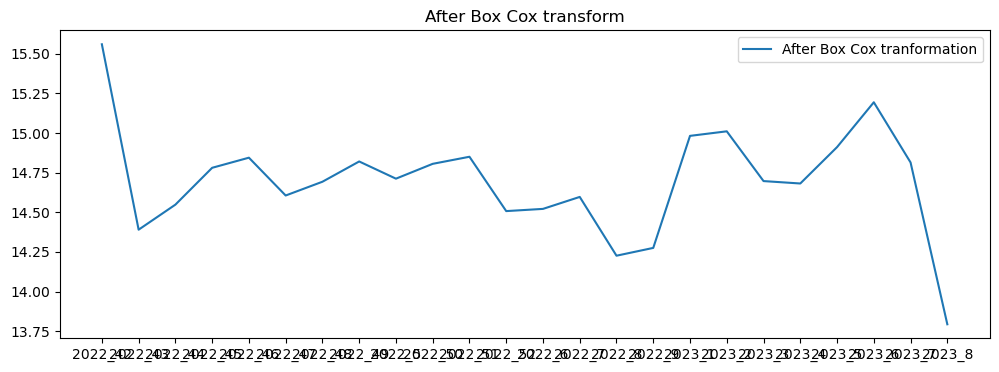

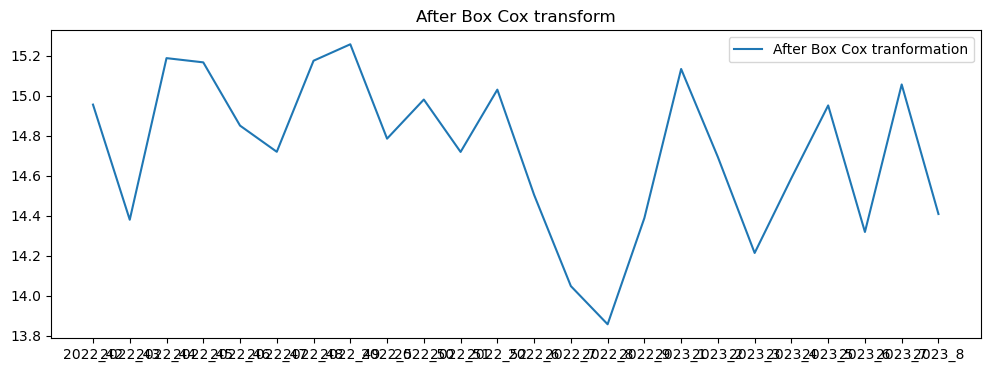

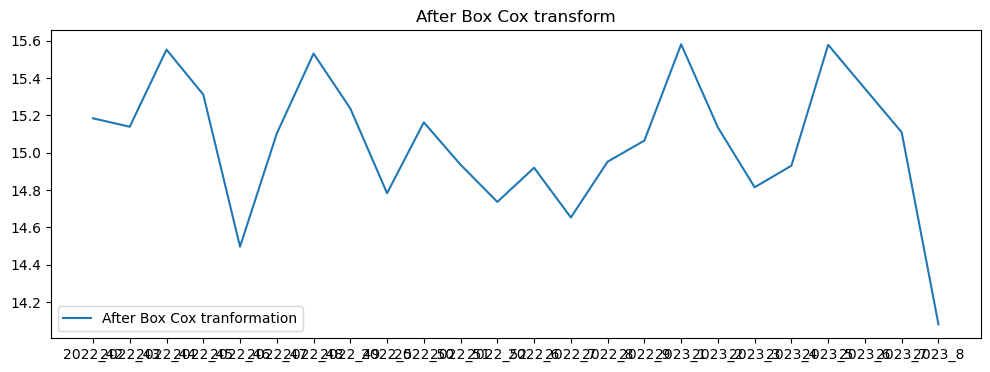

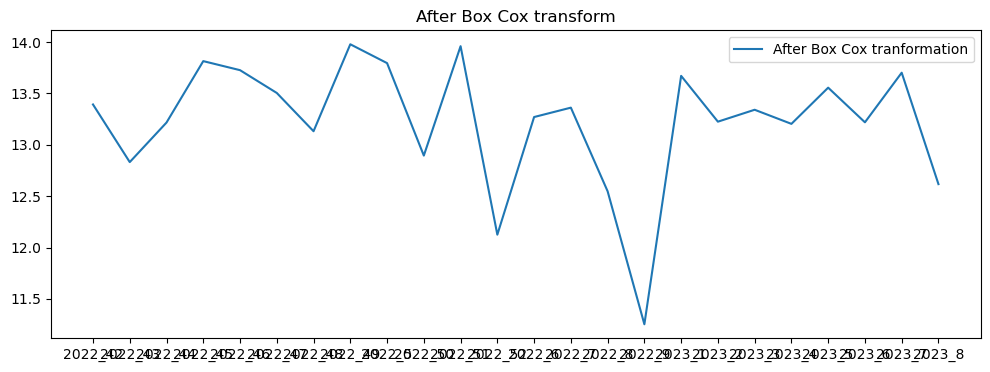

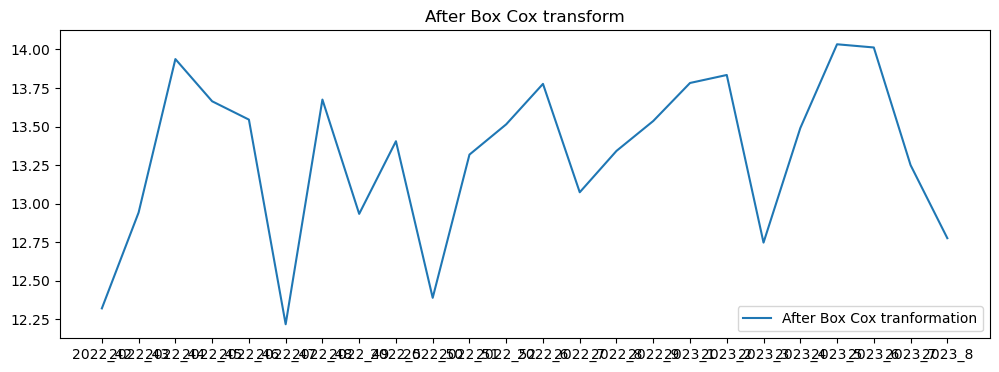

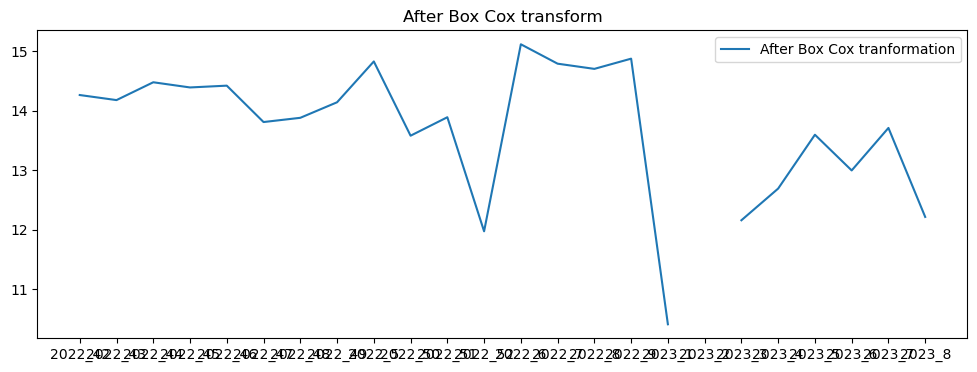

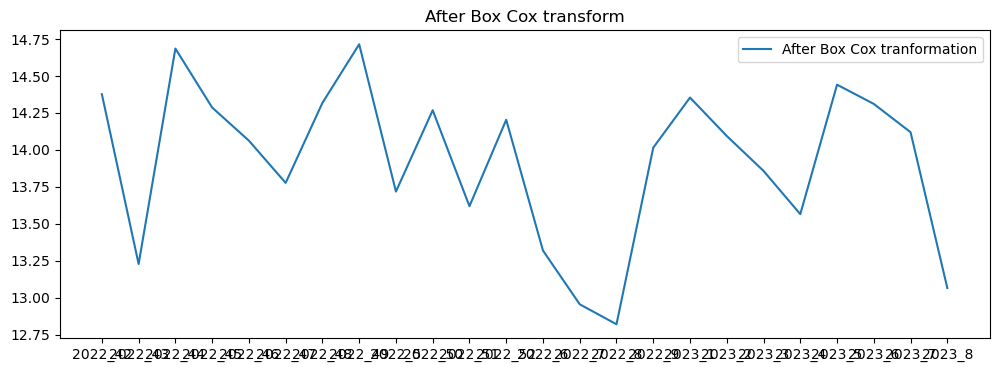

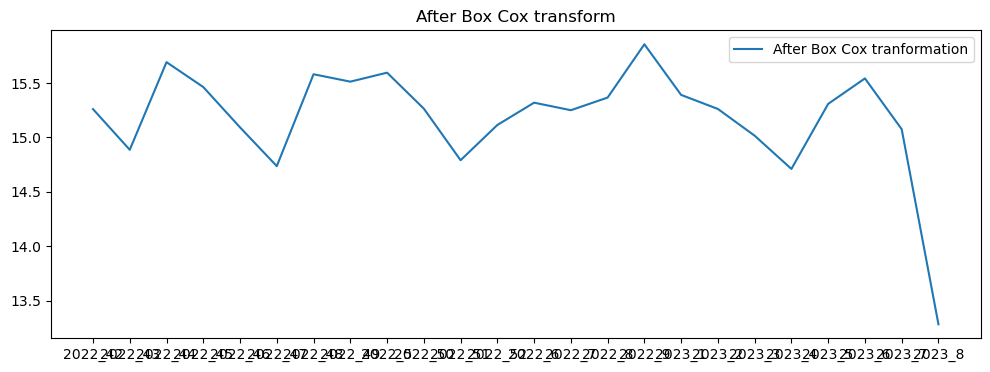

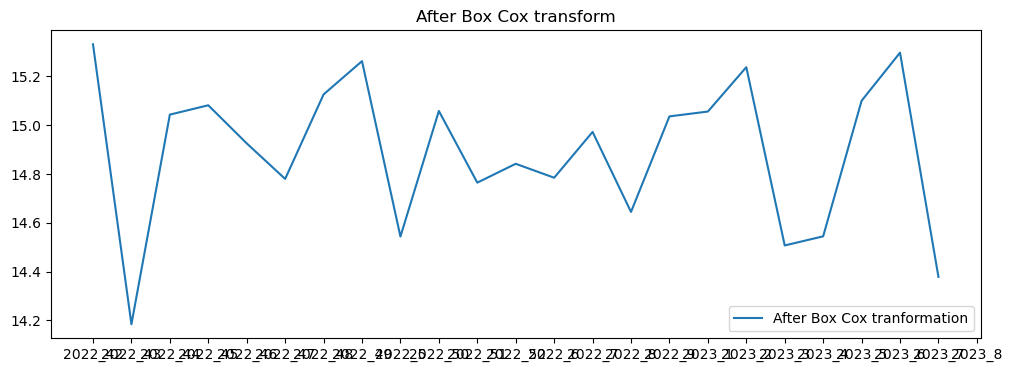

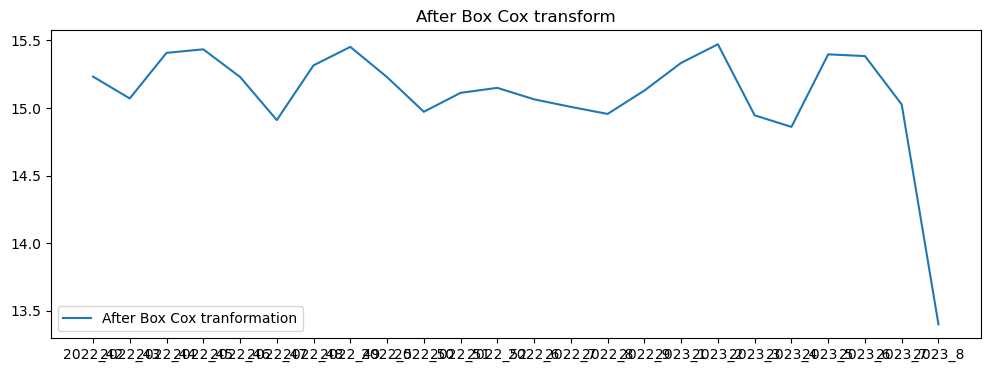

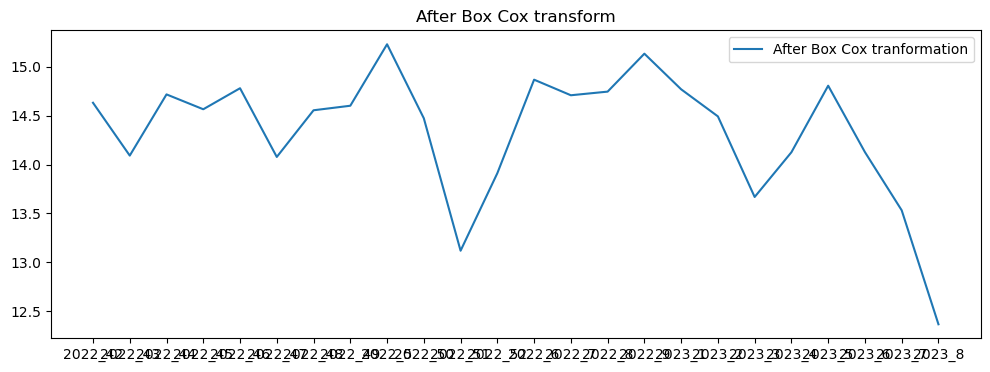

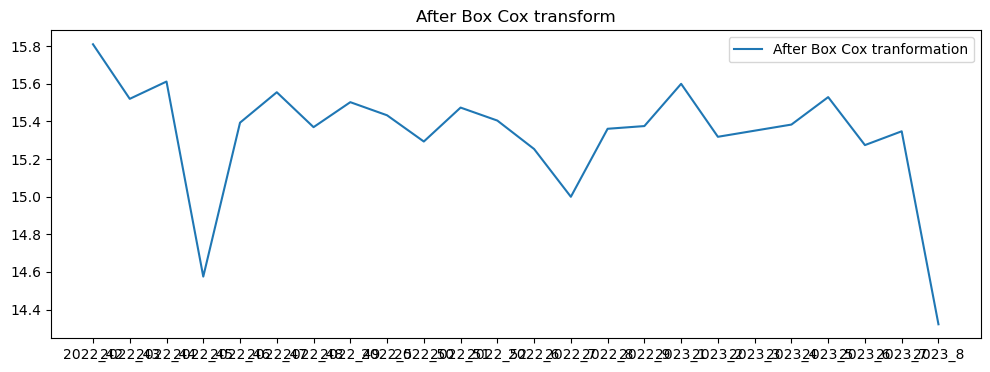

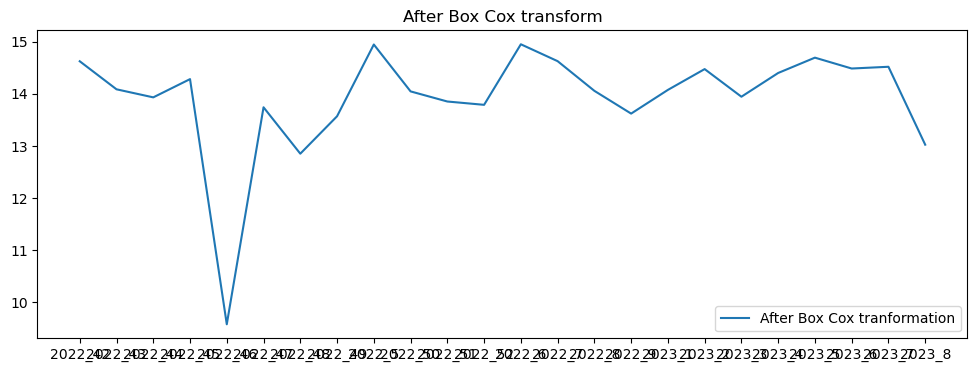

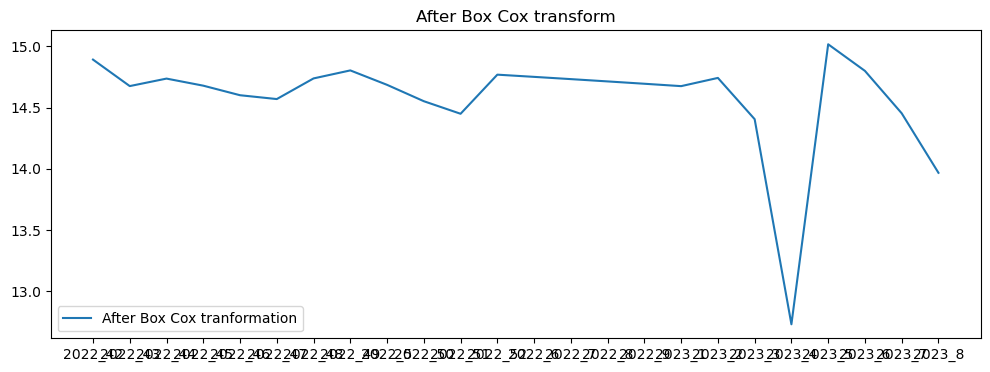

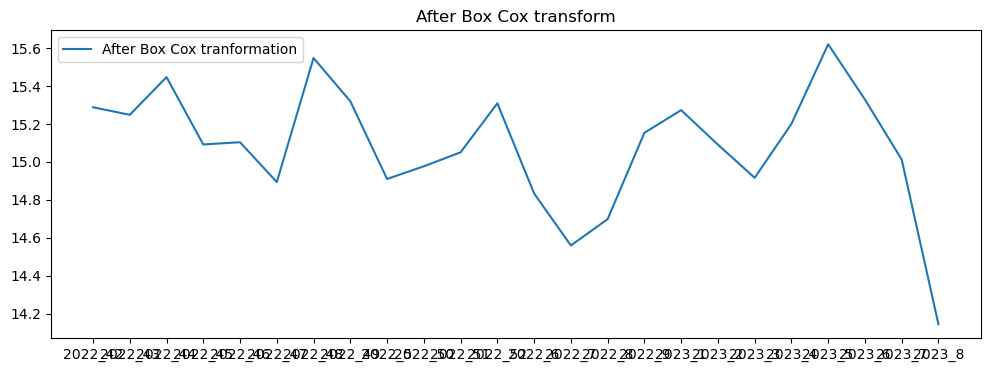

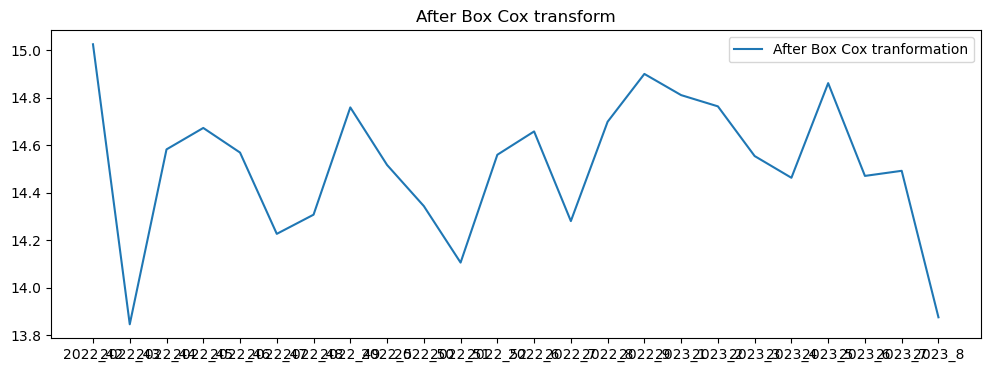

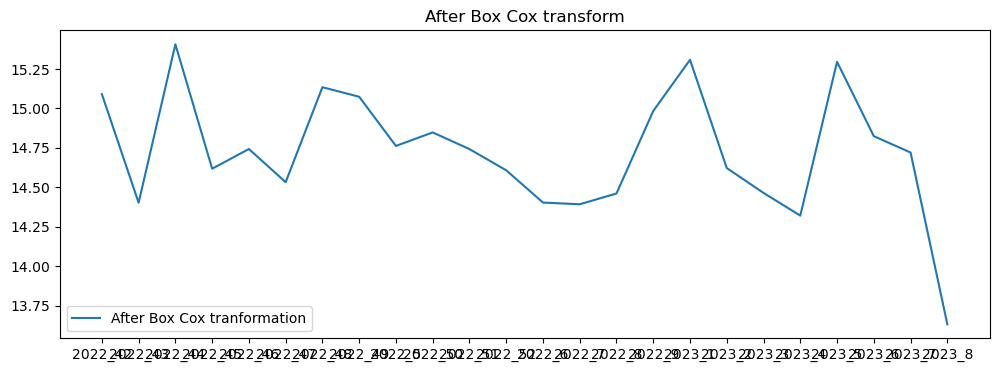

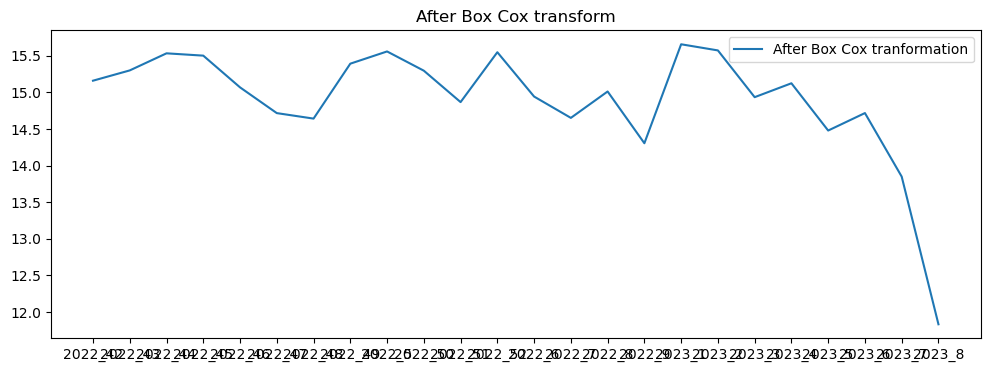

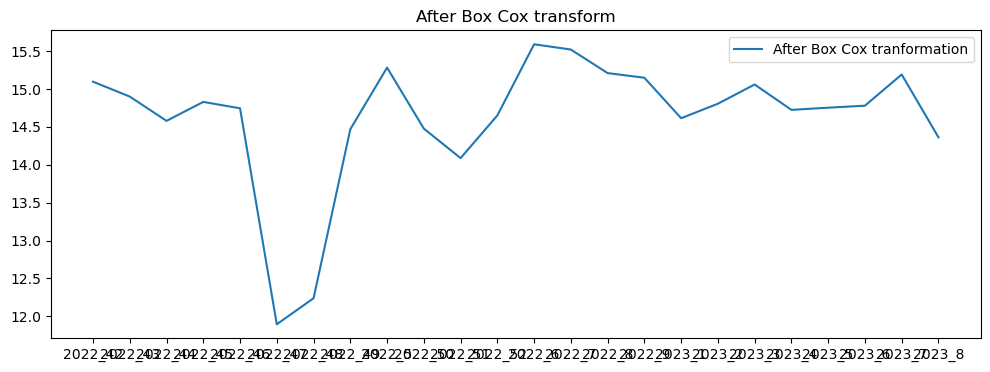

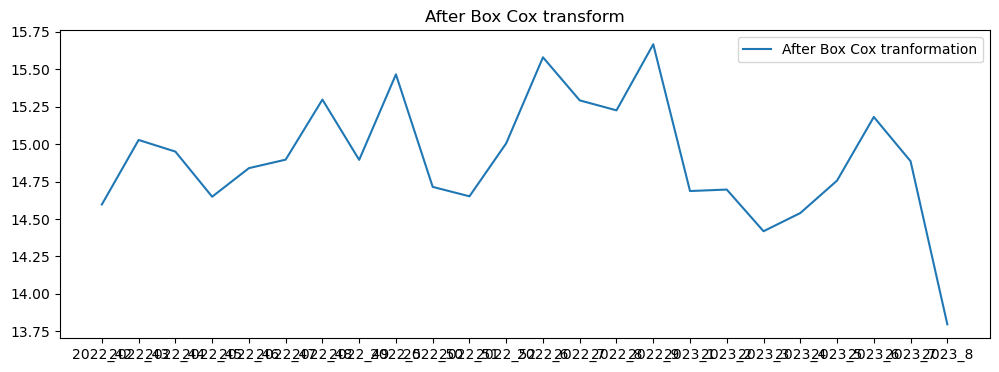

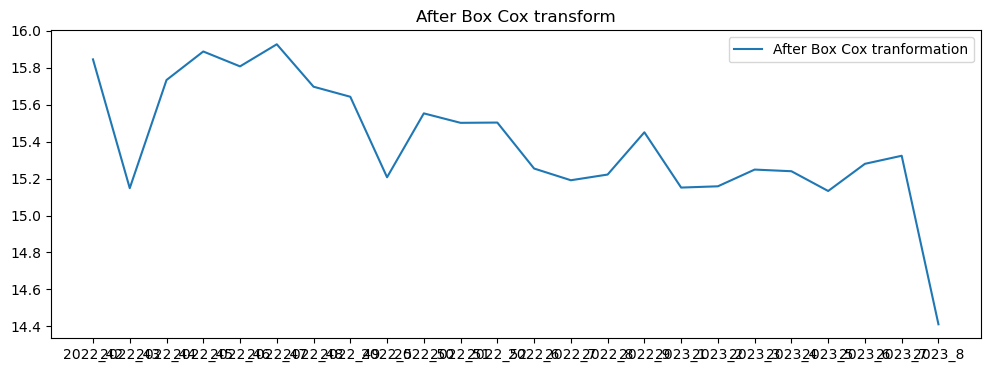

In [69]:
from scipy.stats import boxcox
atm_boxcox = {}
for atm in agg_weeklevel_data['ATMID'].unique():
    data_boxcox = pd.Series(boxcox(last_24_week_dispense[atm], lmbda=0), index = last_24_week_dispense.index)
    atm_boxcox[atm] = data_boxcox
    plt.figure(figsize=(12,4))
    plt.plot(data_boxcox, label='After Box Cox tranformation')
    plt.legend(loc='best')
    plt.title('After Box Cox transform')
    plt.show()

In [70]:
pd.DataFrame(atm_boxcox)

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816   S1CN1142  \
unique_week                                                                     
2022_42      15.560004  14.956320  15.184837  13.393154  12.322076  14.266395   
2022_43      14.390156  14.380768  15.139530  12.832011  12.943715  14.181195   
2022_44      14.548119  15.188669  15.553131  13.217128  13.937905  14.481030   
2022_45      14.780591  15.167550  15.312116  13.815211  13.664339  14.393920   
2022_46      14.844415  14.851361  14.496281  13.727116  13.545537  14.424080   
2022_47      14.605784  14.720376  15.103282  13.505174  12.218989  13.812004   
2022_48      14.692645  15.175718  15.532043  13.132512  13.675444  13.883169   
2022_49      14.820544  15.257949  15.237582  13.979244  12.934587  14.144455   
2022_5       14.712007  14.786100  14.783103  13.795818  13.405435  14.831285   
2022_50      14.805609  14.981626  15.163090  12.895463  12.390475  13.582317   
2022_51      14.850295  14.719729  14.935917  13.960649  13.318752  13.892934   
2022_52      14.507407  15.031165  14.736590  12.125405  13.515081  11.974141   
2022_6       14.521327  14.505152  14.919674  13.270783  13.777185  15.120052   
2022_7       14.596898  14.049000  14.652801  13.362167  13.074643  14.793649   
2022_8       14.225963  13.858091  14.952285  12.547888  13.342783  14.706278   
2022_9       14.275148  14.389255  15.065326  11.252859  13.536590  14.878150   
2023_1       14.982093  15.134462  15.581730  13.671640  13.782987  10.410305   
2023_2       15.010796  14.693892  15.135905  13.225642  13.834823       -inf   
2023_3       14.696796  14.214622  14.814928  13.341660  12.748397  12.160029   
2023_4       14.681560  14.589085  14.930619  13.204312  13.490473  12.693118   
2023_5       14.911118  14.952221  15.578768  13.556740  14.033843  13.598598   
2023_6       15.194025  14.319614  15.343847  13.219490  14.013131  12.997933   
2023_7       14.814303  15.057068  15.109744  13.702566  13.250757  13.712924   
2023_8       13.793265  14.409390  14.080257  12.617520  12.777052  12.216023   

              S1CN2011   S1CN2022   S1CN2820   S1CN3514  ...   SPCND067  \
unique_week                                              ...              
2022_42      14.376497  15.260475  15.331473  15.232819  ...  15.809667   
2022_43      13.227624  14.886512  14.184450  15.070842  ...  15.519713   
2022_44      14.685548  15.691948  15.043307  15.408413  ...  15.611677   
2022_45      14.286389  15.463188  15.081613  15.434701  ...  14.575147   
2022_46      14.062214  15.092604  14.925557  15.230392  ...  15.393148   
2022_47      13.776562  14.736231  14.779944  14.910784  ...  15.554748   
2022_48      14.317860  15.580926  15.126003  15.316138  ...  15.369224   
2022_49      14.714452  15.512721  15.262430  15.452661  ...  15.502002   
2022_5       13.717898  15.595349  14.543784  15.228812  ...  15.432321   
2022_50      14.268177  15.264897  15.058223  14.972077  ...  15.292902   
2022_51      13.618887  14.790787  14.764656  15.112427  ...  15.473262   
2022_52      14.203626  15.114448  14.841911  15.149327  ...  15.404235   
2022_6       13.318752  15.319632  14.784773  15.064266  ...  15.253092   
2022_7       12.955127  15.250286  14.972392  15.008372  ...  14.999230   
2022_8       12.819906  15.366535  14.644717  14.956224  ...  15.360623   
2022_9       14.014771  15.856263  15.036075  15.129369  ...  15.375023   
2023_1       14.353815  15.390874  15.055912  15.334258  ...  15.599574   
2023_2       14.093900  15.261935  15.237655  15.472023  ...  15.318031   
2023_3       13.857612  15.016078  14.507407  14.946106  ...  15.350548   
2023_4       13.565124  14.710619  14.544749  14.860019  ...  15.382980   
2023_5       14.441128  15.308549  15.100049  15.397372  ...  15.528858   
2023_6       14.310938  15.542500  15.297115  15.384855  ...  15.273893   
2023_7       14.119386  15.075731  14.378549  15.026558  ...  15.347311   
2023_8       13.065158  13.2829

### Differencing to remove trend

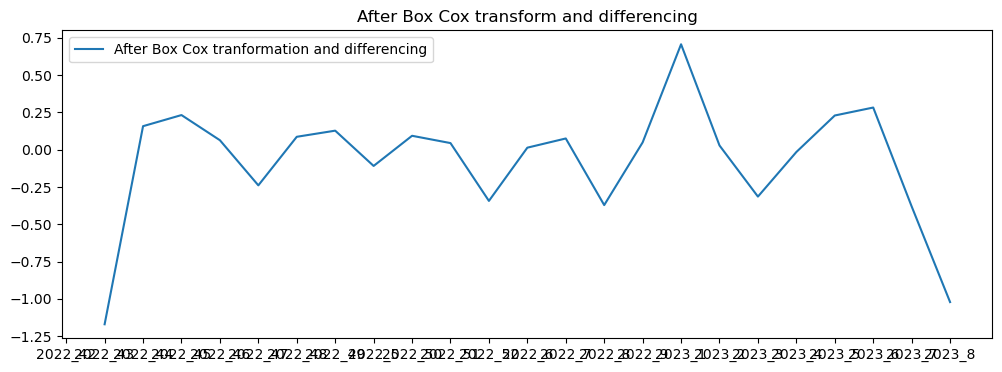

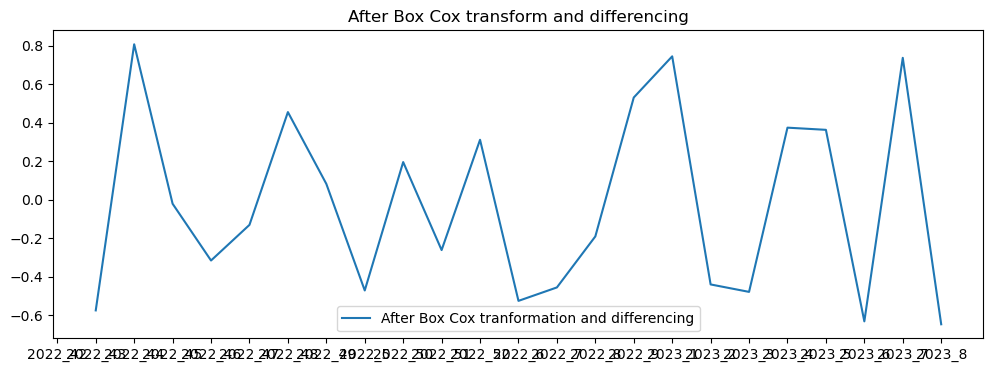

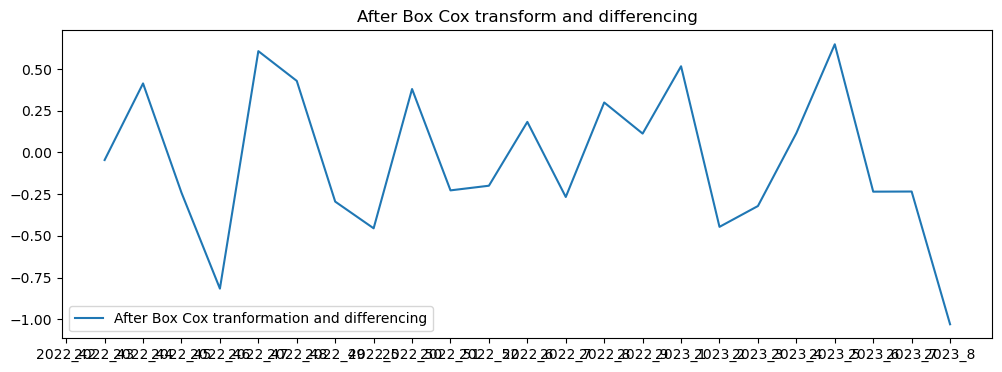

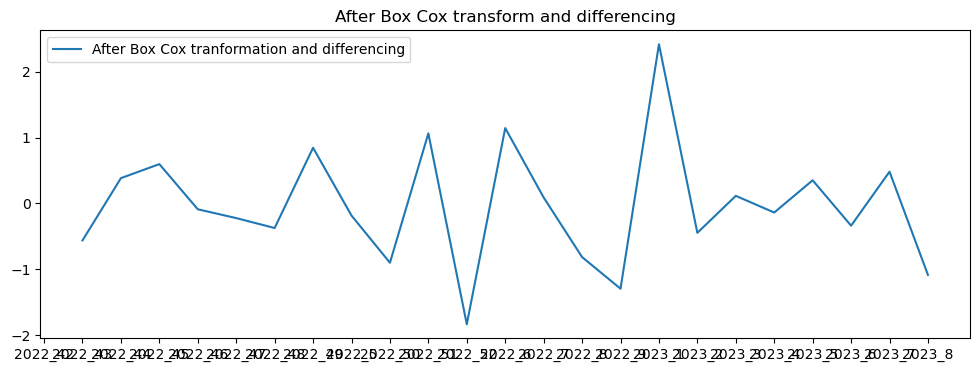

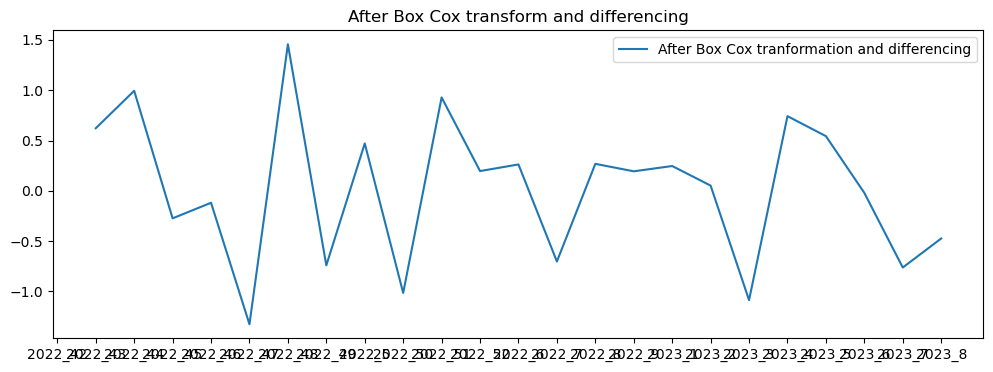

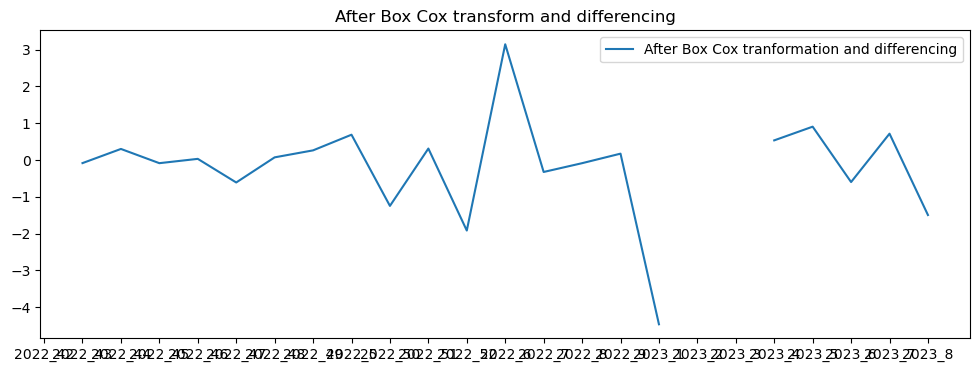

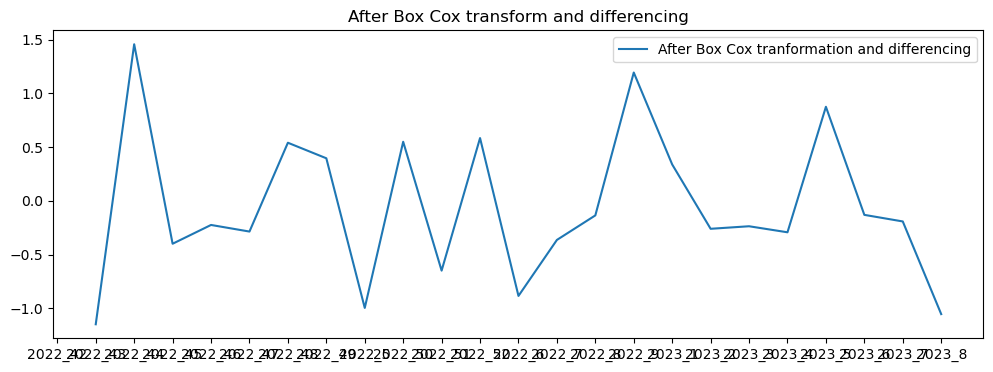

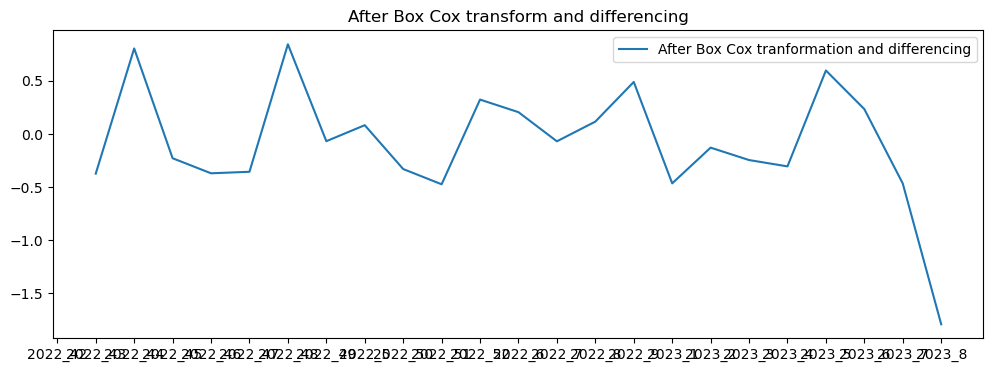

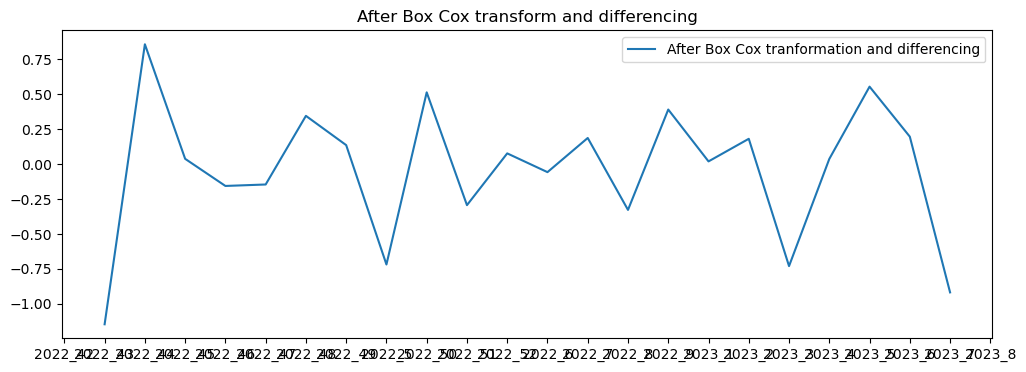

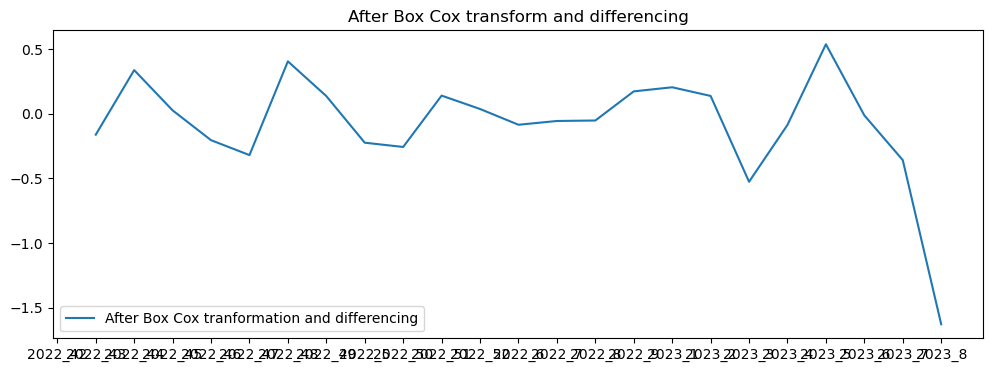

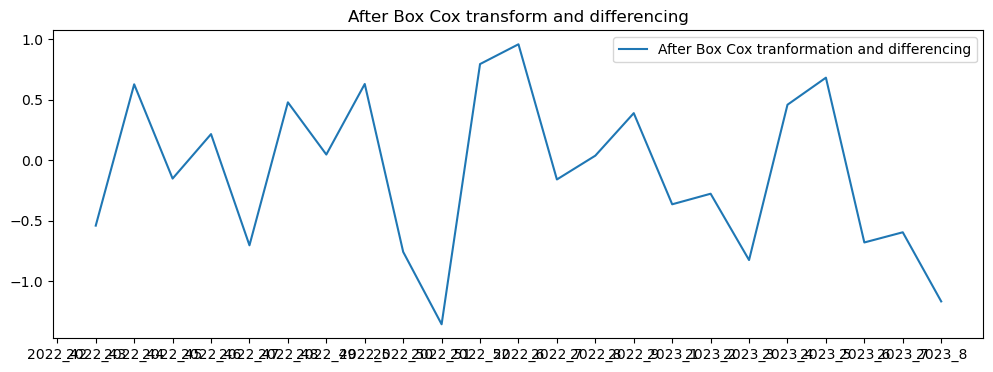

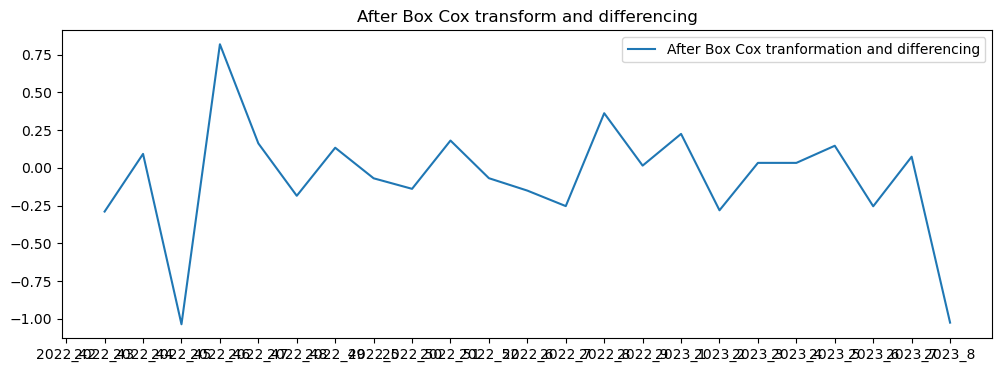

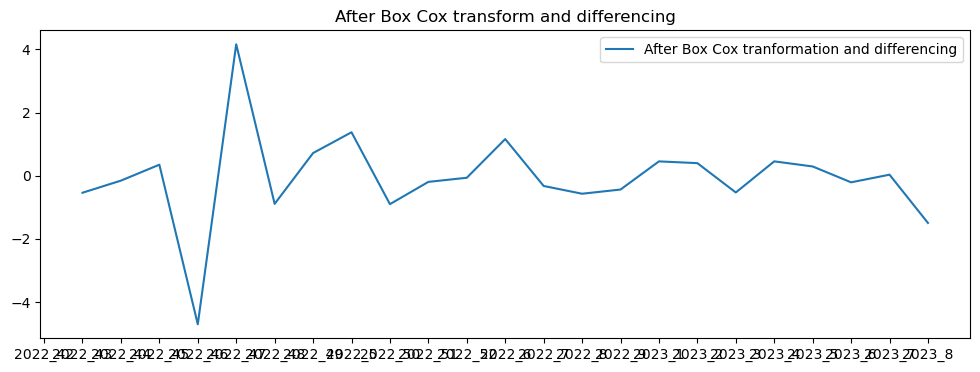

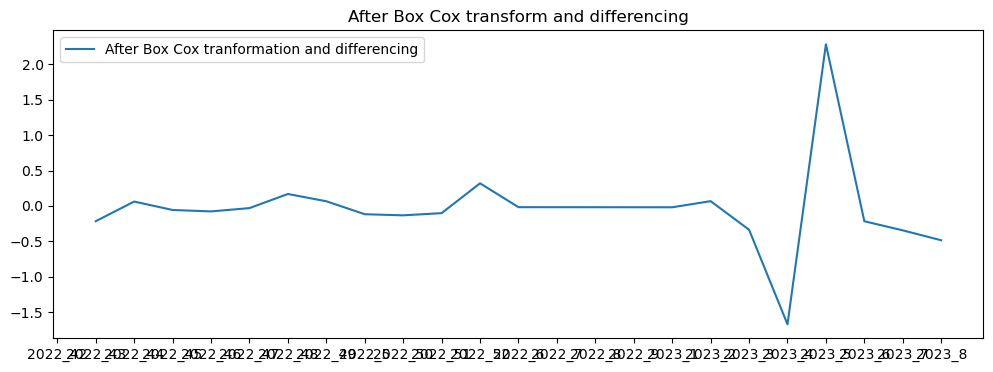

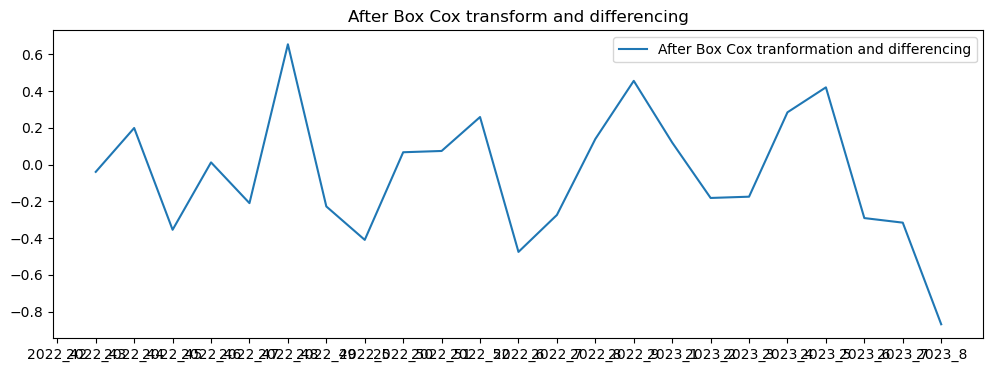

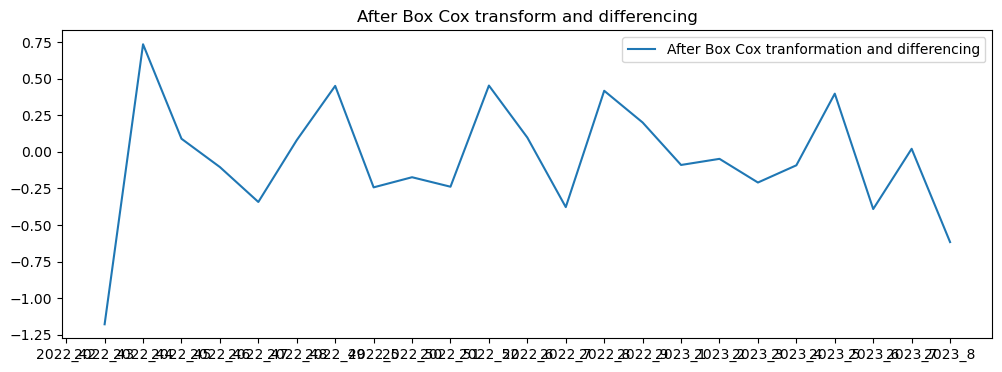

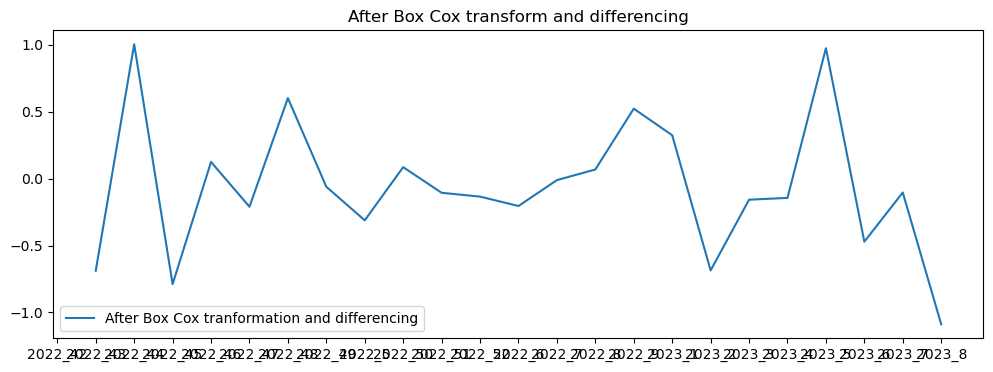

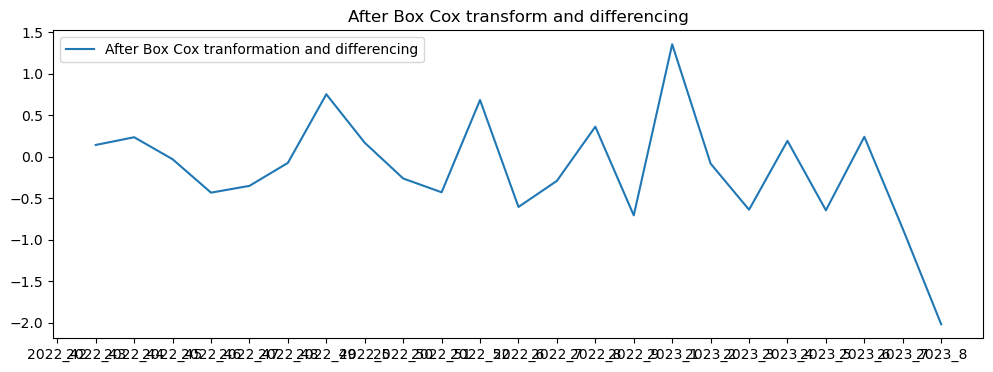

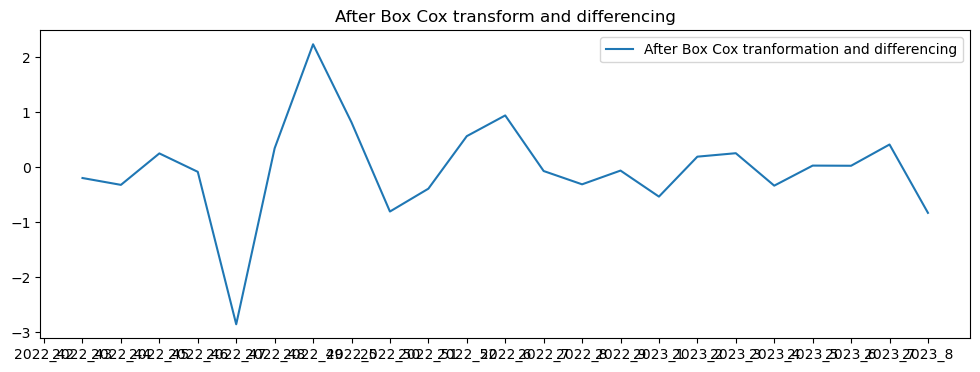

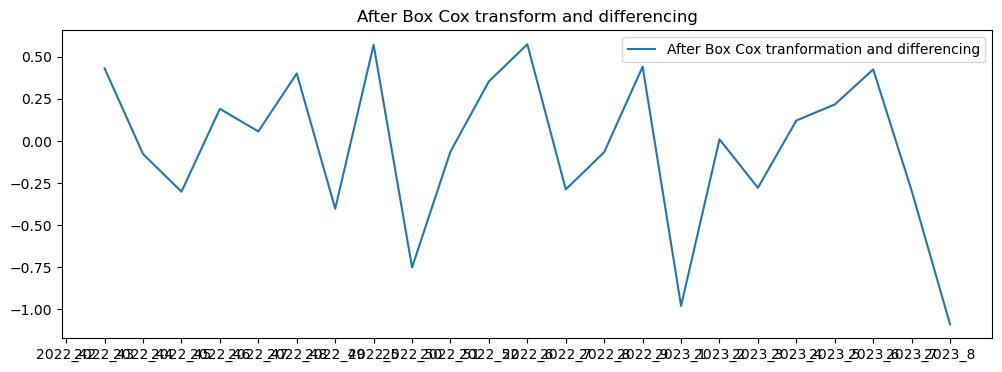

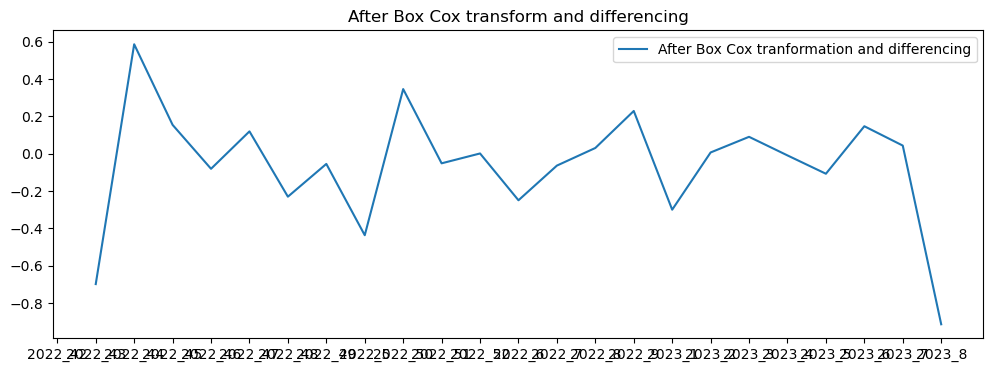

In [71]:
atm_boxcox_diff = {}
for atm in agg_weeklevel_data['ATMID'].unique():
    data_boxcox_diff = pd.Series(atm_boxcox[atm] - atm_boxcox[atm].shift(), last_24_week_dispense.index)
    atm_boxcox_diff[atm] = data_boxcox_diff
    plt.figure(figsize=(12,4))
    plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
    plt.legend(loc='best')
    plt.title('After Box Cox transform and differencing')
    plt.show()

In [73]:
pd.DataFrame(atm_boxcox_diff).head()

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816  S1CN1142  \
unique_week                                                                    
2022_42            NaN        NaN        NaN        NaN        NaN       NaN   
2022_43      -1.169848  -0.575552  -0.045306  -0.561143   0.621639 -0.085200   
2022_44       0.157963   0.807901   0.413600   0.385117   0.994190  0.299835   
2022_45       0.232473  -0.021119  -0.241015   0.598083  -0.273566 -0.087110   
2022_46       0.063824  -0.316189  -0.815834  -0.088094  -0.118801  0.030160   

             S1CN2011  S1CN2022  S1CN2820  S1CN3514  ...  SPCND067  SPCNG376  \
unique_week                                          ...                       
2022_42           NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022_43     -1.148873 -0.373963 -1.147023 -0.161977  ... -0.289953 -0.537726   
2022_44      1.457924  0.805436  0.858857  0.337571  ...  0.091964 -0.154532   
2022_45     -0.399159 -0.228760  0.038305  0.026288  ... -1.036529  0.349717   
2022_46     -0.224174 -0.370584 -0.156056 -0.204308  ...  0.818001 -4.701107   

             T1BH000003039  T1BH000011116  T1BH000274012  T1BH000603091  \
unique_week                                                               
2022_42                NaN            NaN            NaN            NaN   
2022_43          -0.216182      -0.039905      -1.178715      -0.687992   
2022_44           0.061122       0.198638       0.736218       1.003839   
2022_45          -0.057744      -0.354759       0.090248      -0.788172   
2022_46          -0.078007       0.011704      -0.103583       0.124728   

             T1BH007252090  T1NH000575414  T1NY000166081  TPCN10269  
unique_week                                                          
2022_42                NaN            NaN            NaN        NaN  
2022_43           0.140537      -0.196499       0.430785  -0.697753  
2022_44           0.233425      -0.320780      -0.077663   0.585968  
2022_45          -0.031565       0.250253      -0.301266   0.154518  
2022_46          -0.433491      -0.084131       0.190802  -0.080585  

[5 rows x 21 columns]

In [86]:
def recover_original_series(data_boxcox_diff,data_boxcox):
    y_hat_arma = data_boxcox_diff.copy()
    y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
    y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
    y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
    y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])
    return y_hat_arma

In [89]:
# recover_original_series(atm_boxcox_diff['APAN11109'], atm_boxcox['APAN11109'])